In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from skimpy import skim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

/Users/dhanushlalitha/miniconda3/envs/tensorflow/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Load the data
df = pd.read_csv("../data/cleaned_data.csv", encoding = "ISO-8859-1")

In [4]:
df_train, df_test = train_test_split(df, test_size=0.33, random_state=42)

In [5]:
df_train.to_csv('../data/nptrain.csv', index=False)
df_test.to_csv('../data/nptest.csv', index=False)

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df_train.shape, df_test.shape

((228319, 24), (112456, 24))

In [8]:
df_train.head()

,loan_amnt,term (months),int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zip_code
39792,7000.0,36,8.99,222.57,B1,10.0,RENT,154000.0,Source Verified,Jul-2016,Fully Paid,credit_card,23.88,2002,16,0,91725.0,62.2,48,Whole Funded,INDIVIDUAL,2.0,0.0,5113
18428,2000.0,36,11.53,65.99,B5,3.0,RENT,41600.0,Not Verified,Jun-2015,Fully Paid,debt_consolidation,26.49,2009,11,0,3541.0,20.1,16,Whole Funded,INDIVIDUAL,0.0,0.0,22690
276596,24000.0,60,12.39,538.61,C1,10.0,MORTGAGE,120000.0,Source Verified,Jan-2015,Fully Paid,debt_consolidation,19.01,1992,13,0,38065.0,79.0,34,Whole Funded,INDIVIDUAL,1.0,0.0,48052
289594,15575.0,60,17.57,391.87,D2,5.0,MORTGAGE,62000.0,Source Verified,Jan-2014,Charged Off,debt_consolidation,26.06,2003,9,0,15089.0,74.7,23,Whole Funded,INDIVIDUAL,5.0,0.0,48052
280207,12000.0,36,12.69,402.54,C2,1.0,RENT,36000.0,Source Verified,Feb-2015,Charged Off,debt_consolidation,34.67,2006,18,0,5681.0,38.6,28,Fractional Funded,INDIVIDUAL,0.0,0.0,86630


## Exploratory Data Analysis

We begin by exploring each varibale, plot it and compare it with loan status

In [9]:
df1 = df_train.copy()
df1['loan_status'] = pd.get_dummies(df1['loan_status'], drop_first=True)


In [10]:
df1.head()

,loan_amnt,term (months),int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zip_code
39792,7000.0,36,8.99,222.57,B1,10.0,RENT,154000.0,Source Verified,Jul-2016,True,credit_card,23.88,2002,16,0,91725.0,62.2,48,Whole Funded,INDIVIDUAL,2.0,0.0,5113
18428,2000.0,36,11.53,65.99,B5,3.0,RENT,41600.0,Not Verified,Jun-2015,True,debt_consolidation,26.49,2009,11,0,3541.0,20.1,16,Whole Funded,INDIVIDUAL,0.0,0.0,22690
276596,24000.0,60,12.39,538.61,C1,10.0,MORTGAGE,120000.0,Source Verified,Jan-2015,True,debt_consolidation,19.01,1992,13,0,38065.0,79.0,34,Whole Funded,INDIVIDUAL,1.0,0.0,48052
289594,15575.0,60,17.57,391.87,D2,5.0,MORTGAGE,62000.0,Source Verified,Jan-2014,False,debt_consolidation,26.06,2003,9,0,15089.0,74.7,23,Whole Funded,INDIVIDUAL,5.0,0.0,48052
280207,12000.0,36,12.69,402.54,C2,1.0,RENT,36000.0,Source Verified,Feb-2015,False,debt_consolidation,34.67,2006,18,0,5681.0,38.6,28,Fractional Funded,INDIVIDUAL,0.0,0.0,86630


In [11]:
non_numeric_columns = df1.select_dtypes(exclude=['number']).columns.tolist()
print("Non-numeric columns:")
print(non_numeric_columns)

Non-numeric columns:
['sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'initial_list_status', 'application_type']


In [12]:
numeric_columns = df1.drop(columns=non_numeric_columns)

In [13]:
numeric_columns.head()

,loan_amnt,term (months),int_rate,installment,emp_length,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,zip_code
39792,7000.0,36,8.99,222.57,10.0,154000.0,23.88,2002,16,0,91725.0,62.2,48,2.0,0.0,5113
18428,2000.0,36,11.53,65.99,3.0,41600.0,26.49,2009,11,0,3541.0,20.1,16,0.0,0.0,22690
276596,24000.0,60,12.39,538.61,10.0,120000.0,19.01,1992,13,0,38065.0,79.0,34,1.0,0.0,48052
289594,15575.0,60,17.57,391.87,5.0,62000.0,26.06,2003,9,0,15089.0,74.7,23,5.0,0.0,48052
280207,12000.0,36,12.69,402.54,1.0,36000.0,34.67,2006,18,0,5681.0,38.6,28,0.0,0.0,86630


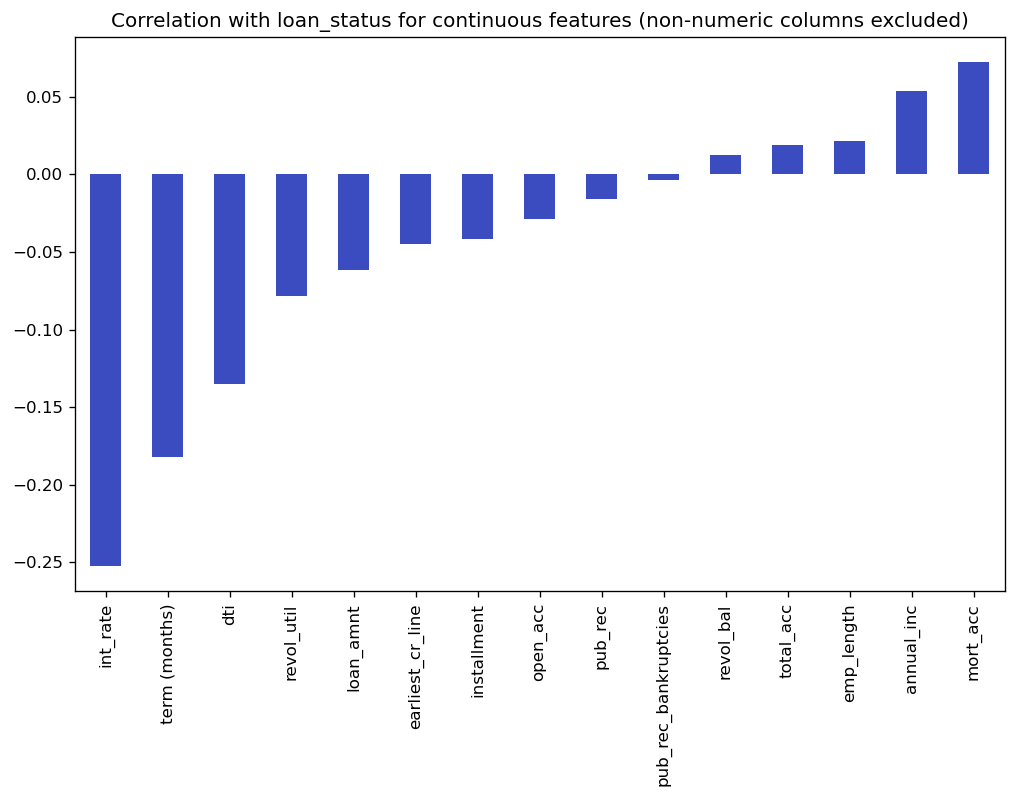

In [14]:
non_numeric_columns = ['sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'zip_code', 'initial_list_status', 'application_type']

# Filter out non-numeric columns
numeric_columns = df1.drop(columns=non_numeric_columns)

# Calculate the correlation
correlation = numeric_columns.corr()['loan_status']

# Plot the correlations
plt.figure(figsize=(10, 6), dpi=120)
correlation.sort_values().drop('loan_status').plot(kind='bar', cmap='coolwarm')
plt.title('Correlation with loan_status for continuous features (non-numeric columns excluded)')
plt.xticks(rotation=90)
plt.show()


#int_rate, fico_range_high and fico_range_low are highly correlated with loan_status compared to other features.

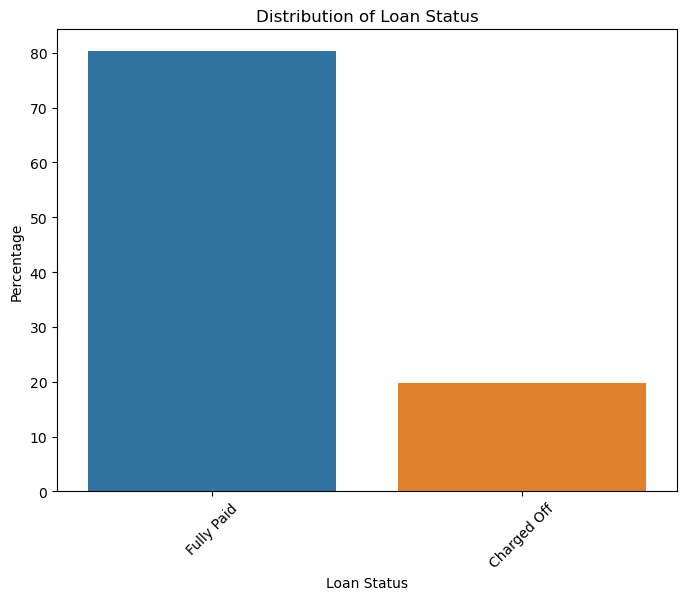

In [15]:
# Calculate the percentage of each loan status category
status_percentage = df_train['loan_status'].value_counts(normalize=True) * 100

# Plot the distribution of loan status as percentages
plt.figure(figsize=(8, 6))
sns.barplot(x=status_percentage.index, y=status_percentage.values)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


# Univariate Analyis

Continuous Variables:
1. loan_amnt
2. int_rate
3. installment
4. annual_inc
5. dti
6. fico_range_low
7. fico_range_high
8. open_acc
9. pub_rec
10. revol_bal
11. revol_util
12. total_acc
13. mort_acc
14. pub_rec_bankruptcies

Categorical VAriables:
1. term (months)  
2. earliest_cr_line
3. sub_grade
4. home_ownership
5. verification_status
6. issue_d
7. loan_status
8. purpose
9. zip_code
10. initial_list_status
11. application_type

### 1. loan_amnt

In [16]:
df_train['loan_amnt'].describe()

count    228319.000000
mean      14530.667400
std        8406.338706
min        1000.000000
25%        8000.000000
50%       12450.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

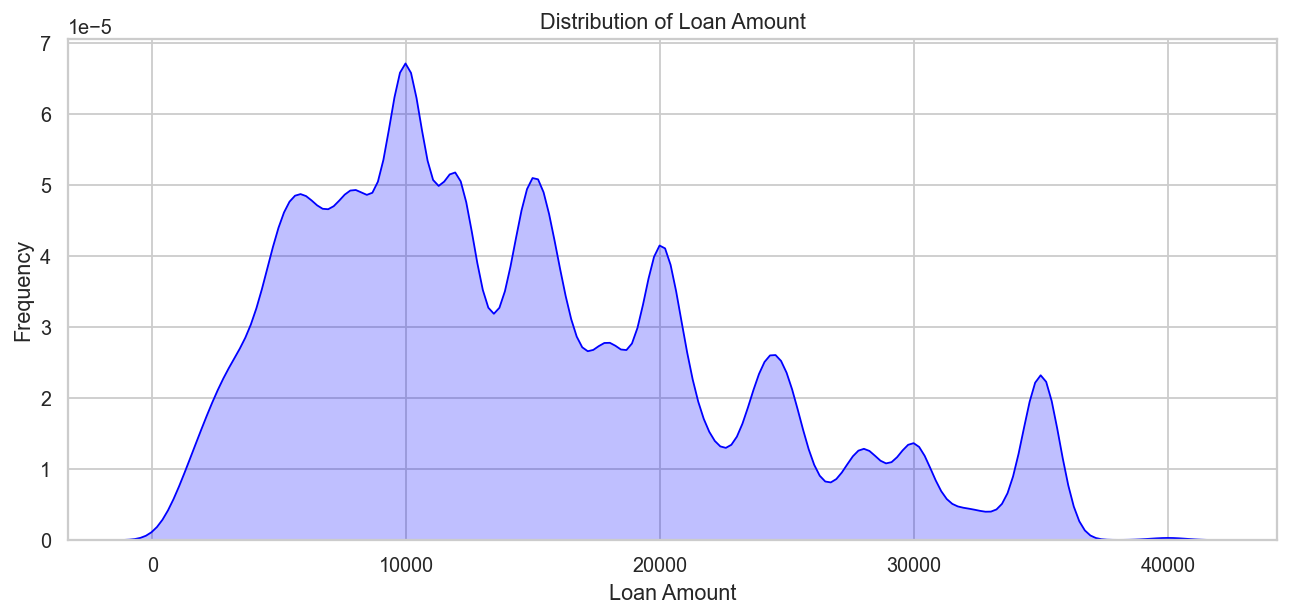

In [17]:
# Distribution of loan_amnt
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5), dpi =130)

# Plot the distribution of annual income
sns.kdeplot(df_train['loan_amnt'],shade= True,color='blue')

# Add labels and title
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount')

# Show the plot
plt.show()


In [18]:
df_train.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,45091.0,15579.224790,8496.559005,1000.0,9250.0,14400.0,20125.0,40000.0
Fully Paid,183228.0,14272.625499,8363.879259,1000.0,8000.0,12000.0,20000.0,40000.0


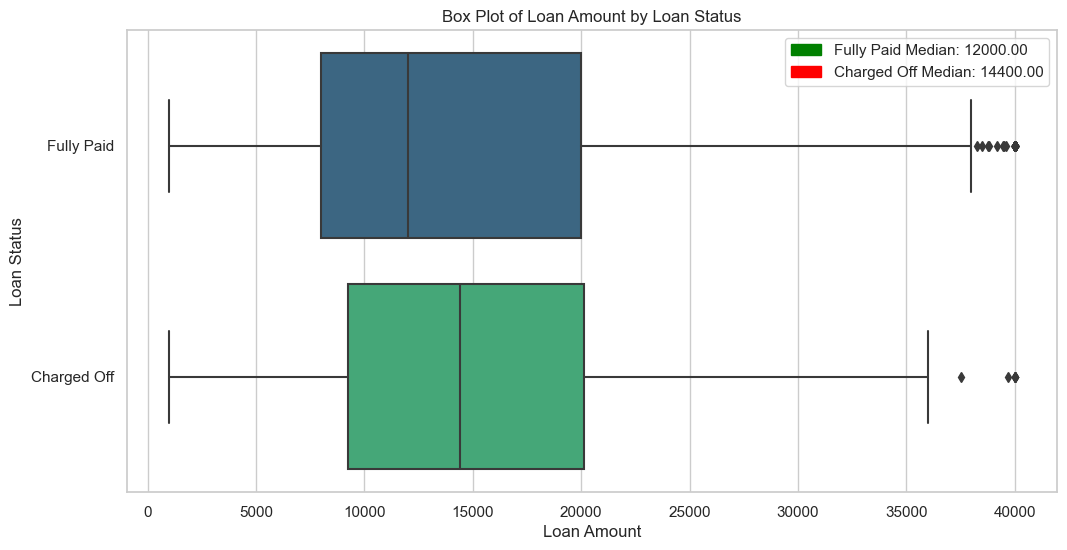

In [19]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, y='loan_status', x='loan_amnt', palette='viridis')

# Calculate medians
fully_paid_median = df_train[df_train['loan_status'] == 'Fully Paid']['loan_amnt'].median()
charged_off_median = df_train[df_train['loan_status'] == 'Charged Off']['loan_amnt'].median()

# Add median lines
fully_paid_legend = mpatches.Patch(color='green', label=f'Fully Paid Median: {fully_paid_median:.2f}')
charged_off_legend = mpatches.Patch(color='red', label=f'Charged Off Median: {charged_off_median:.2f}')
plt.legend(handles=[fully_paid_legend, charged_off_legend])

plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Box Plot of Loan Amount by Loan Status')
plt.show()

We can observe that on an average the chances of charge off is higher if the loan_amount is higher

### 2. int_rate 

In [20]:
df_train['int_rate'].describe()

count    228319.000000
mean         13.807306
std           4.509436
min           5.320000
25%          10.740000
50%          13.440000
75%          16.780000
max          30.990000
Name: int_rate, dtype: float64

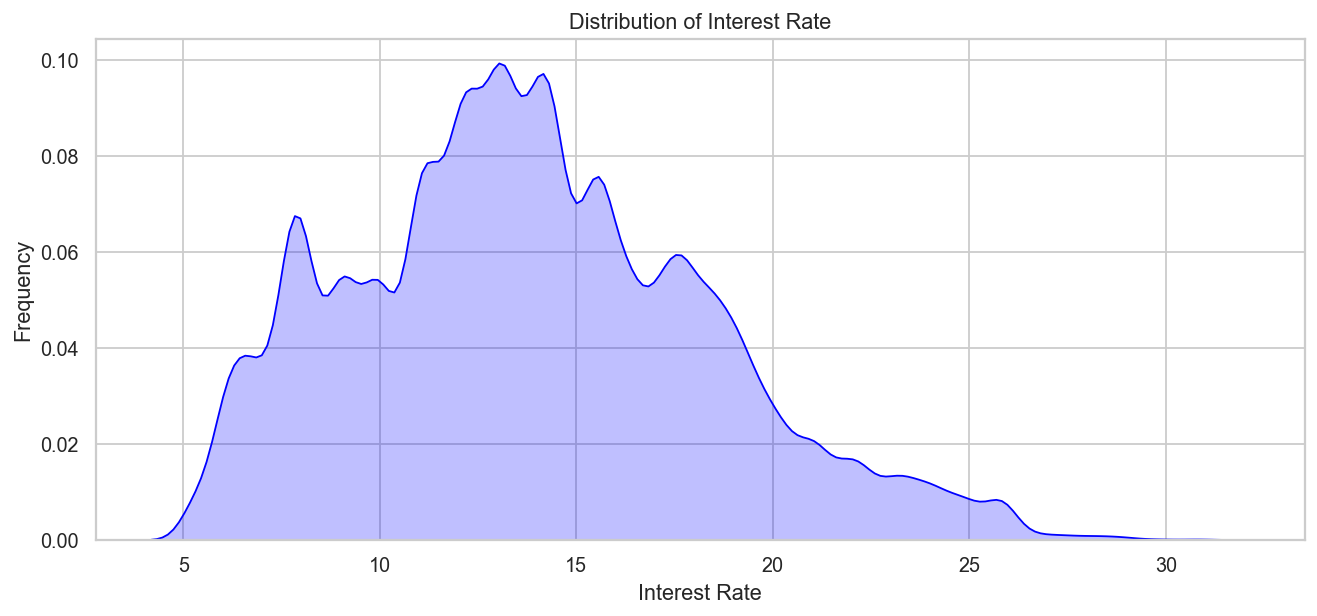

In [21]:
# Distribution of int_rate
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5), dpi =130)

# Plot the distribution of annual income
sns.kdeplot(df_train['int_rate'],shade= True,color='blue')

# Add labels and title
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Interest Rate')

# Show the plot
plt.show()


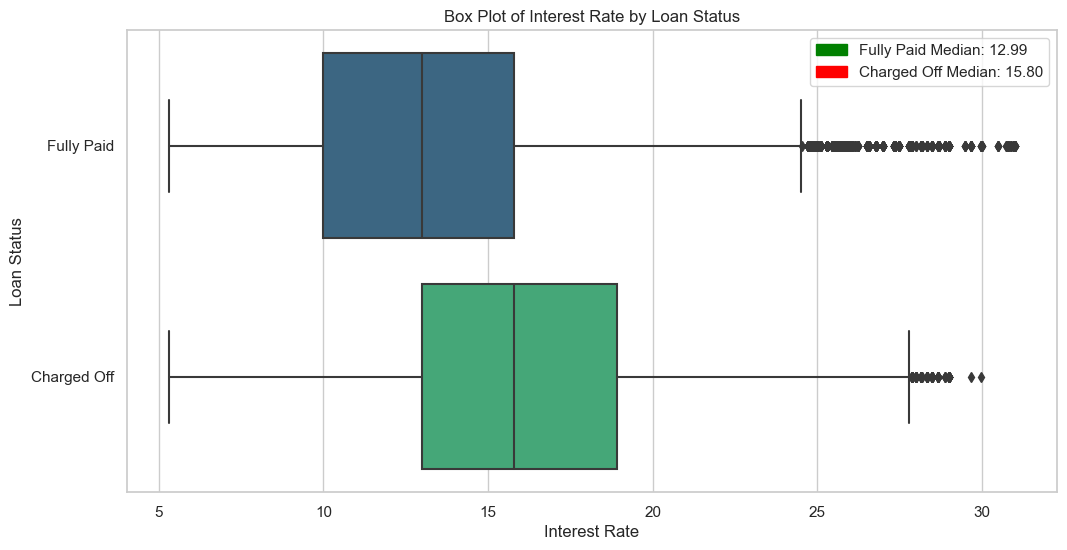

In [22]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, y='loan_status', x='int_rate', palette='viridis')

# Calculate medians
fully_paid_median = df_train[df_train['loan_status'] == 'Fully Paid']['int_rate'].median()
charged_off_median = df_train[df_train['loan_status'] == 'Charged Off']['int_rate'].median()

# Add median lines
fully_paid_legend = mpatches.Patch(color='green', label=f'Fully Paid Median: {fully_paid_median:.2f}')
charged_off_legend = mpatches.Patch(color='red', label=f'Charged Off Median: {charged_off_median:.2f}')
plt.legend(handles=[fully_paid_legend, charged_off_legend])

plt.xlabel('Interest Rate')
plt.ylabel('Loan Status')
plt.title('Box Plot of Interest Rate by Loan Status')
plt.show()

We can observe that the average interest rate is lower for fully paid loans compared to the charged off ones

### 3. installment

In [23]:
df_train['installment'].describe()

count    228319.000000
mean        445.884996
std         252.742394
min          21.620000
25%         263.390000
50%         388.930000
75%         586.015000
max        1527.000000
Name: installment, dtype: float64

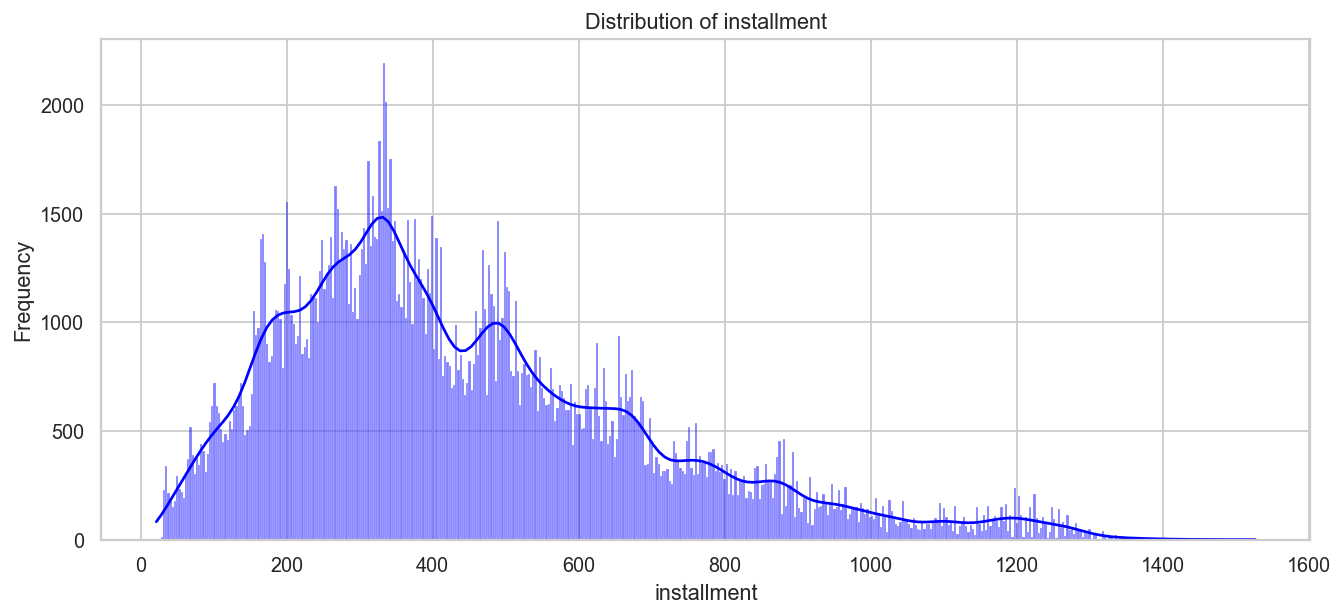

In [24]:
# Distribution of annual_inc
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5), dpi =130)

# Plot the distribution of annual income
sns.histplot(df_train['installment'],bins =500, kde= True,color='blue')

# Add labels and title
plt.xlabel('installment')
plt.ylabel('Frequency')
plt.title('Distribution of installment')

# Show the plot
plt.show()


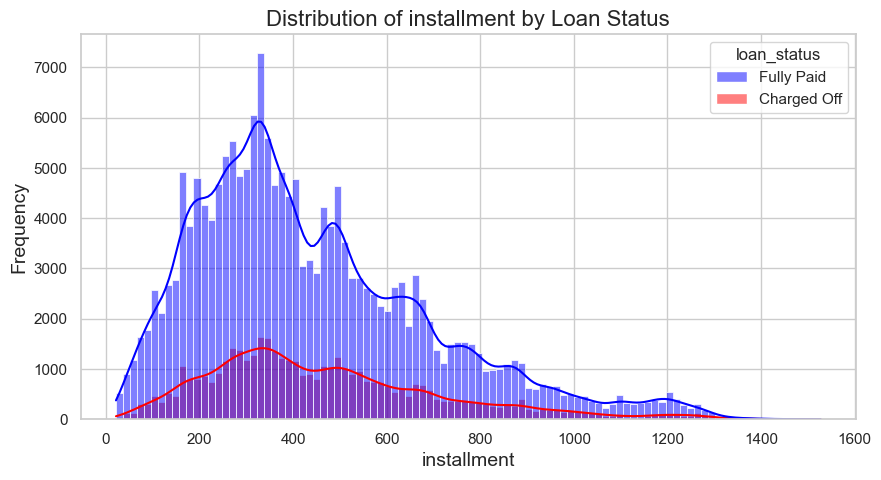

In [25]:

sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(data=df_train, x='installment', hue='loan_status', bins=100, kde=True, palette= {'Charged Off': 'red', 'Fully Paid': 'blue'})

# Customize the plot further
plt.xlabel('installment', fontsize=14 )
plt.ylabel('Frequency', fontsize=14, )
plt.title('Distribution of installment by Loan Status', fontsize=16, )

# Show plot
plt.show()


In [26]:
df_train.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,45091.0,467.184457,249.817340,21.62,286.3,413.94,601.185,1527.00
Fully Paid,183228.0,440.643363,253.183136,28.75,256.9,382.61,581.180,1503.85


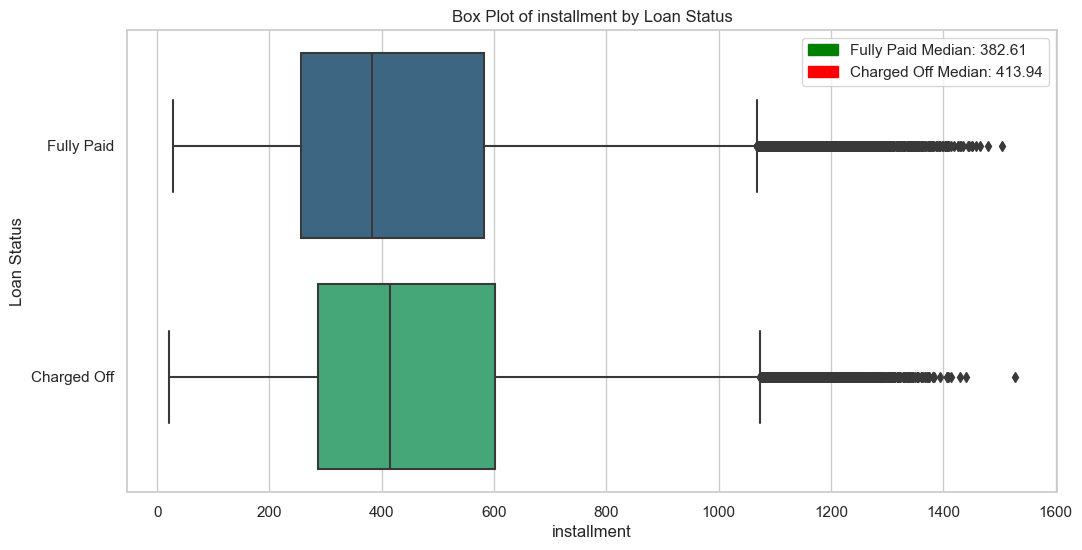

In [27]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, y='loan_status', x='installment', palette='viridis')

# Calculate medians
fully_paid_median = df_train[df_train['loan_status'] == 'Fully Paid']['installment'].median()
charged_off_median = df_train[df_train['loan_status'] == 'Charged Off']['installment'].median()

# Add median lines
fully_paid_legend = mpatches.Patch(color='green', label=f'Fully Paid Median: {fully_paid_median:.2f}')
charged_off_legend = mpatches.Patch(color='red', label=f'Charged Off Median: {charged_off_median:.2f}')
plt.legend(handles=[fully_paid_legend, charged_off_legend])

plt.xlabel('installment')
plt.ylabel('Loan Status')
plt.title('Box Plot of installment by Loan Status')
plt.show()

Avg installment is higher for charged off, will retain this ferature

### 4. annual_inc

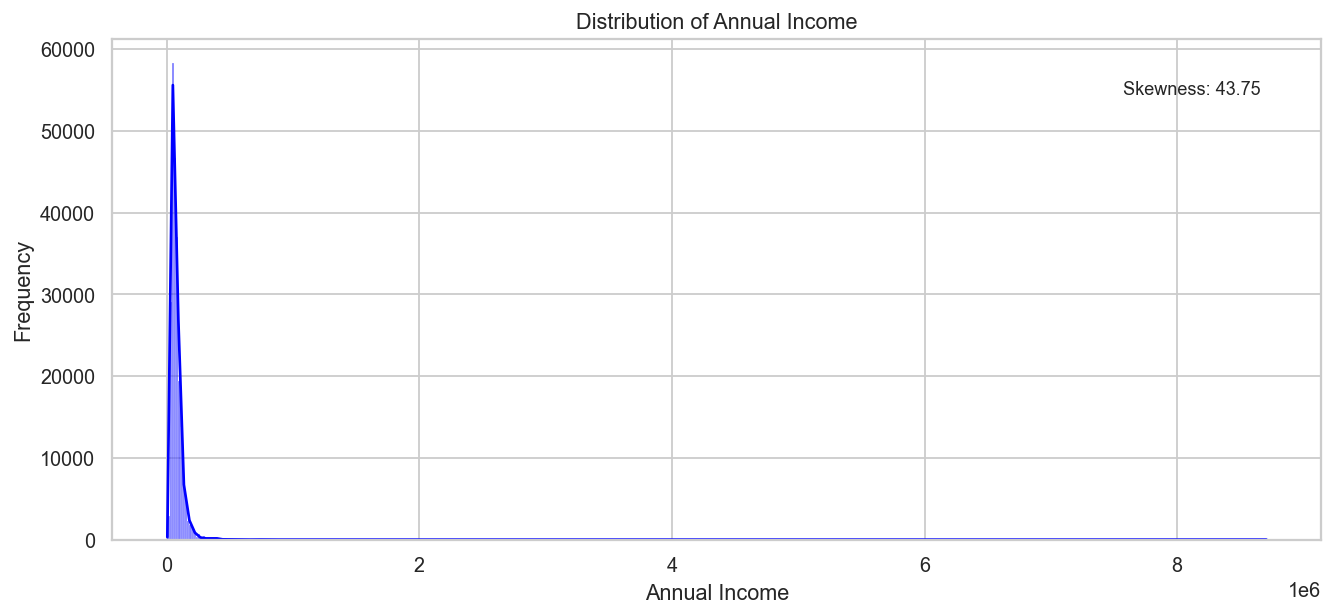

In [28]:
# Distribution of annual_inc
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5), dpi =130)

# Plot the distribution of annual income
sns.histplot(df_train['annual_inc'],bins =500, kde= True,color='blue')

skewness = df_train['annual_inc'].skew()

plt.text(0.95, 0.9, f'Skewness: {skewness:.2f}', ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)
# Add labels and title
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Income')

# Show the plot
plt.show()


The salary distribution is highly skewed towards right. Let's find how many customers have annual_inc higher than $250k

In [29]:
pd.options.display.float_format = '{:.2f}'.format
description = df_train['annual_inc'].describe()
print(description)

count    228319.00
mean      75921.62
std       61371.70
min        5000.00
25%       47000.00
50%       65000.00
75%       90000.00
max     8706582.00
Name: annual_inc, dtype: float64


In [30]:
num_above_250k = df_train[df_train['annual_inc'] > 250000].shape[0]

# Total number of people
total_people = df_train.shape[0]

# Calculate the percentage
percentage_above_250k = (num_above_250k / total_people) * 100

print("Percentage of people with annual income greater than 250k: {:.2f}%".format(percentage_above_250k))

Percentage of people with annual income greater than 250k: 0.86%


Onbly 0.86% of the population have income greater than 250k - so we can drop these outliers

In [31]:
df_train = df_train[df_train['annual_inc'] <= 250000]


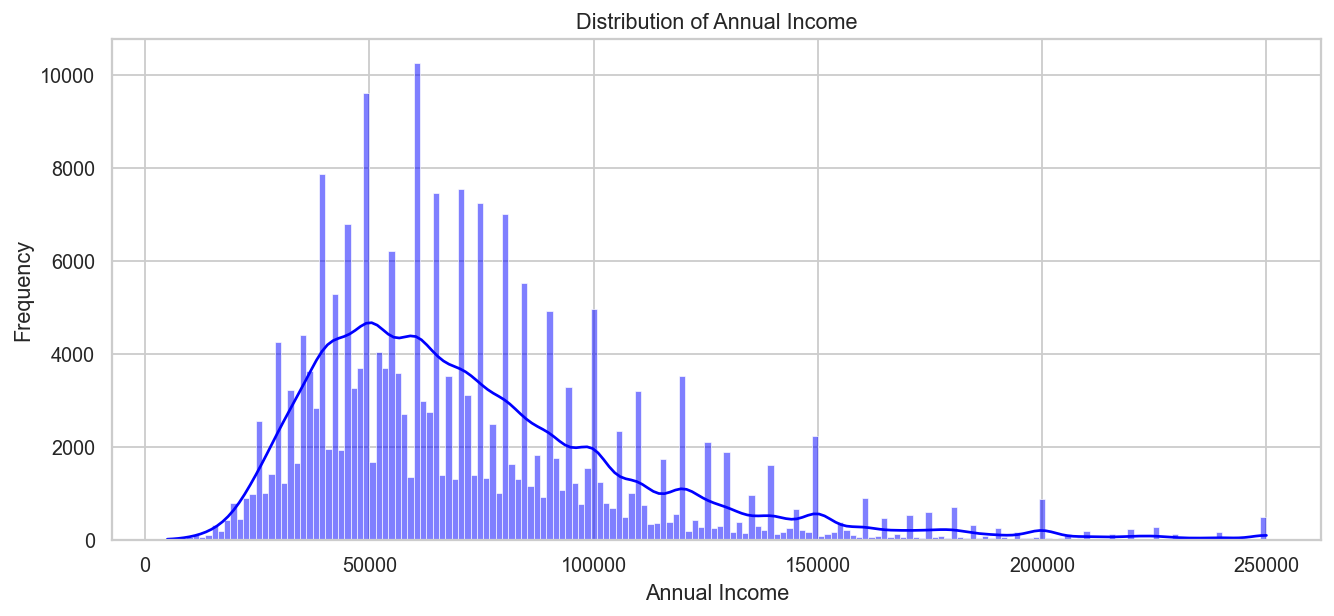

In [32]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5), dpi =130)

# Plot the distribution of annual income
sns.histplot(df_train['annual_inc'], kde= True,color='blue')

# Add labels and title
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Income')

# Show the plot
plt.show()


Look much better less skewed

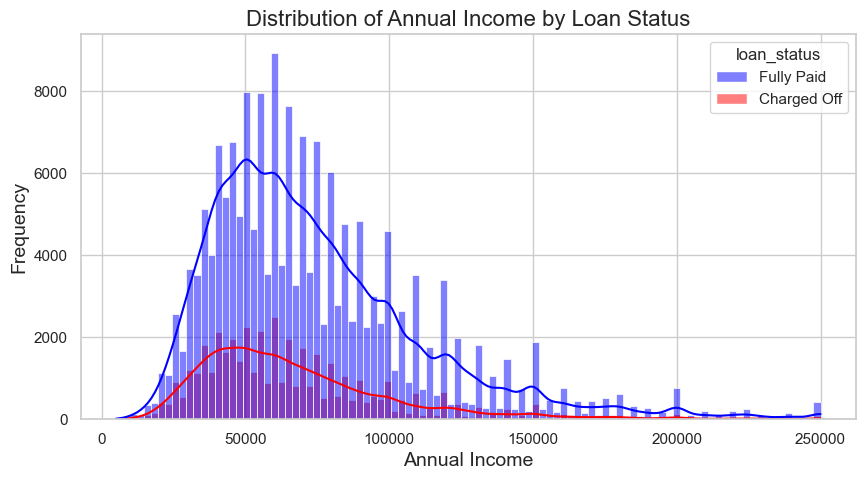

In [33]:

sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(data=df_train, x='annual_inc', hue='loan_status', bins=100, kde=True, palette= {'Charged Off': 'red', 'Fully Paid': 'blue'})

# Customize the plot further
plt.xlabel('Annual Income', fontsize=14 )
plt.ylabel('Frequency', fontsize=14, )
plt.title('Distribution of Annual Income by Loan Status', fontsize=16, )

# Show plot
plt.show()


In [34]:
df_train.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,44823.00,67275.22,34427.37,6000.00,43138.00,60000.00,81000.00,250000.00
Fully Paid,181534.00,74569.24,37865.16,5000.00,48000.00,65000.00,91500.00,250000.00


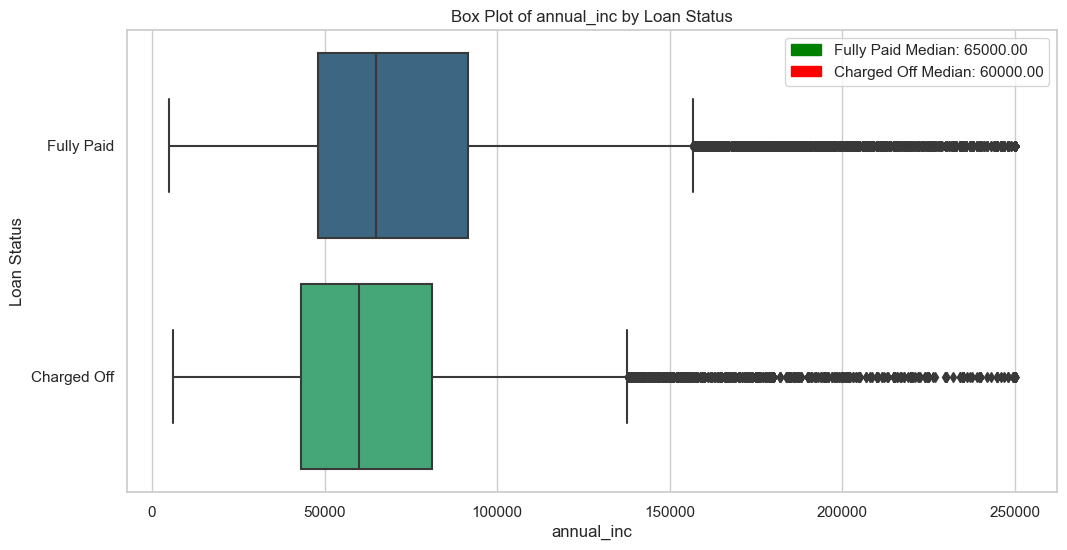

In [35]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, y='loan_status', x='annual_inc', palette='viridis')

# Calculate medians
fully_paid_median = df_train[df_train['loan_status'] == 'Fully Paid']['annual_inc'].median()
charged_off_median = df_train[df_train['loan_status'] == 'Charged Off']['annual_inc'].median()

# Add median lines
fully_paid_legend = mpatches.Patch(color='green', label=f'Fully Paid Median: {fully_paid_median:.2f}')
charged_off_legend = mpatches.Patch(color='red', label=f'Charged Off Median: {charged_off_median:.2f}')
plt.legend(handles=[fully_paid_legend, charged_off_legend])

plt.xlabel('annual_inc')
plt.ylabel('Loan Status')
plt.title('Box Plot of annual_inc by Loan Status')
plt.show()

The mean annual_inc for customers who fully paid the loan and who did not differs by around $5000.

### 5. dti

In [36]:
df_train['dti'].describe()

count   226357.00
mean        17.75
std          8.12
min          0.00
25%         11.66
50%         17.29
75%         23.44
max        138.03
Name: dti, dtype: float64

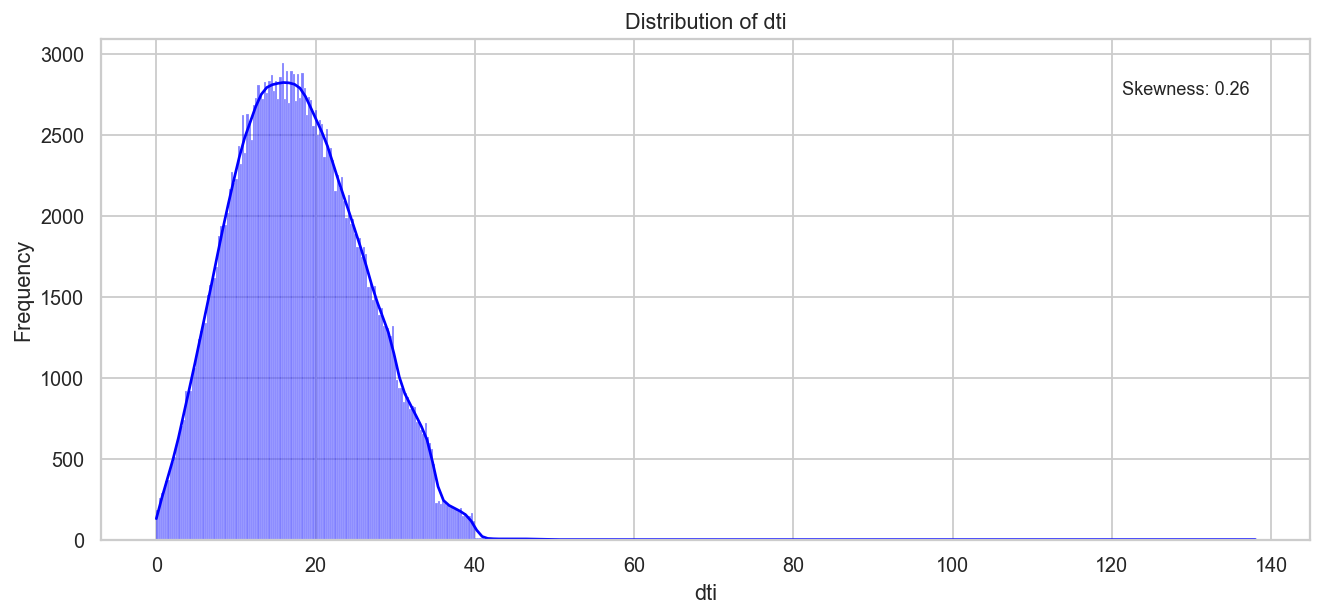

In [37]:
# Distribution of annual_inc
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5), dpi =130)

# Plot the distribution of annual income
sns.histplot(df_train['dti'],bins =500, kde= True,color='blue')

skewness = df_train['dti'].skew()

plt.text(0.95, 0.9, f'Skewness: {skewness:.2f}', ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)

# Add labels and title
plt.xlabel('dti')
plt.ylabel('Frequency')
plt.title('Distribution of dti')

# Show the plot
plt.show()


The dti distribution is highly skewed towards right. Let's find how many customers have dti higher than 50

In [38]:
pd.options.display.float_format = '{:.2f}'.format
description = df_train['dti'].describe()
print(description)

count   226357.00
mean        17.75
std          8.12
min          0.00
25%         11.66
50%         17.29
75%         23.44
max        138.03
Name: dti, dtype: float64


In [39]:
num_above_50 = df_train[df_train['dti'] > 50].shape[0]

# Total number of people
total_people = df_train.shape[0]

# Calculate the percentage
percentage_above_50 = (num_above_50 / total_people) * 100

print("Percentage of people with dti greater than 50: {:.2f}%".format(percentage_above_50))

Percentage of people with dti greater than 50: 0.01%


In [40]:
df_train = df_train[df_train['dti'] <= 50]

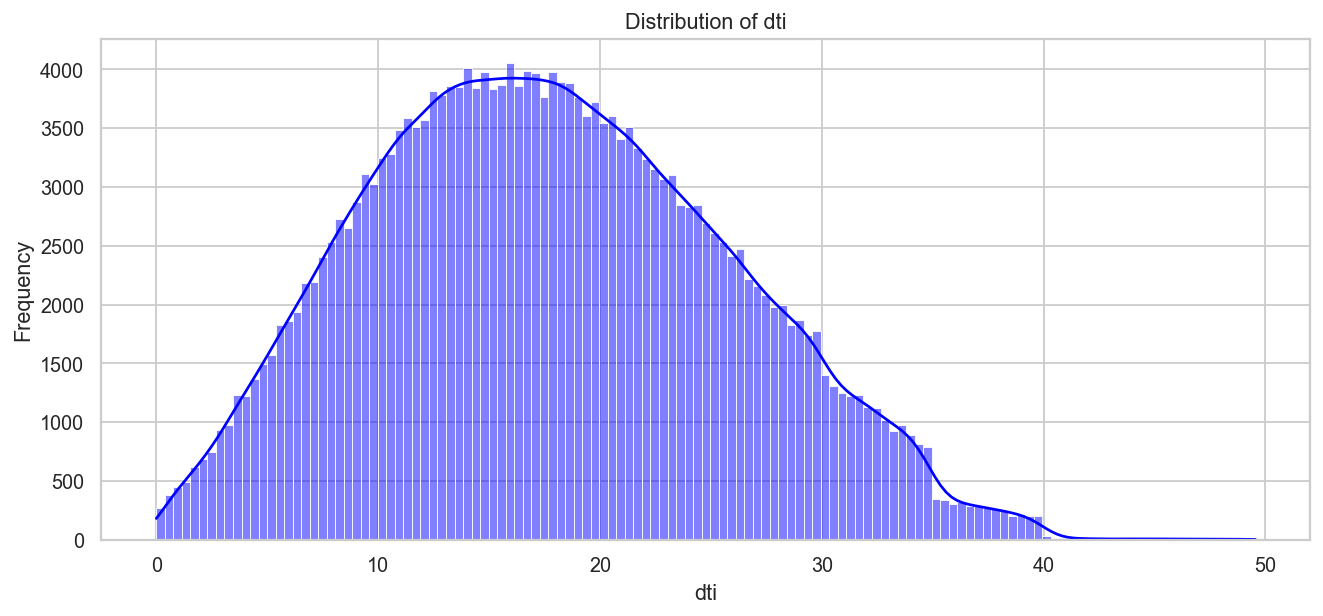

In [41]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5), dpi =130)

# Plot the distribution of annual income
sns.histplot(df_train['dti'], kde= True,color='blue')

# Add labels and title
plt.xlabel('dti')
plt.ylabel('Frequency')
plt.title('Distribution of dti')

# Show the plot
plt.show()


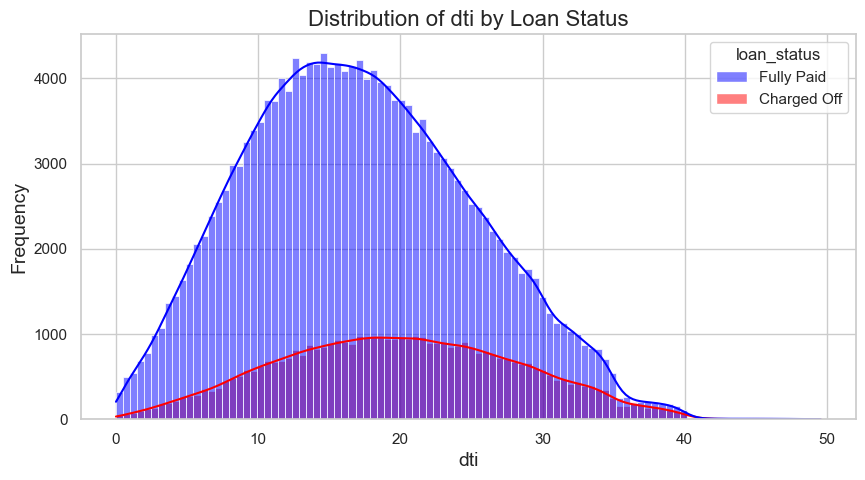

In [42]:

sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(data=df_train, x='dti', hue='loan_status', bins=100, kde=True, palette= {'Charged Off': 'red', 'Fully Paid': 'blue'})

# Customize the plot further
plt.xlabel('dti', fontsize=14 )
plt.ylabel('Frequency', fontsize=14, )
plt.title('Distribution of dti by Loan Status', fontsize=16, )

# Show plot
plt.show()


In [43]:
df_train.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,44818.00,19.95,8.35,0.00,13.76,19.80,26.02,49.55
Fully Paid,181524.00,17.21,7.96,0.00,11.24,16.71,22.74,49.14


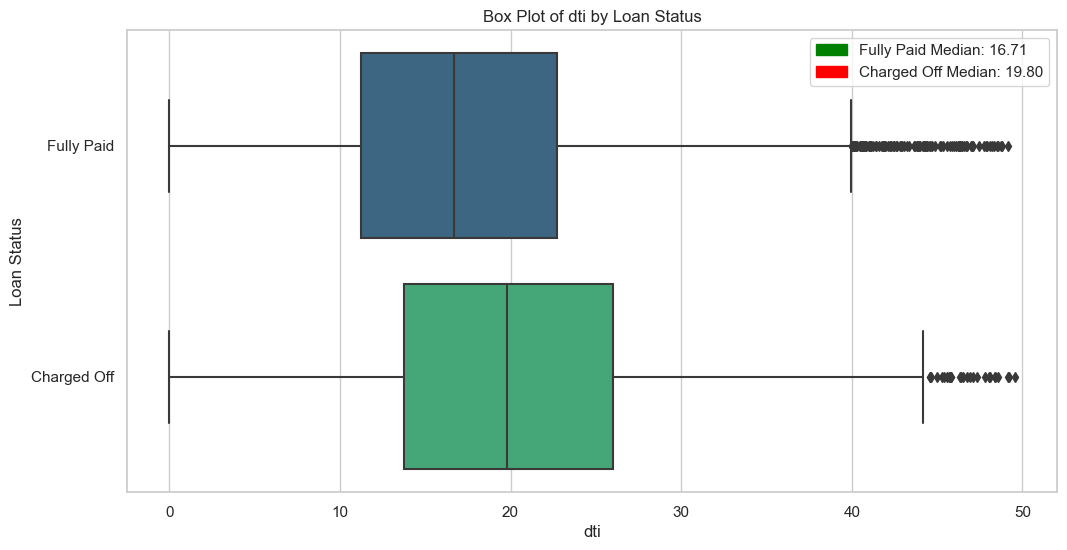

In [44]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, y='loan_status', x='dti', palette='viridis')

# Calculate medians
fully_paid_median = df_train[df_train['loan_status'] == 'Fully Paid']['dti'].median()
charged_off_median = df_train[df_train['loan_status'] == 'Charged Off']['dti'].median()

# Add median lines
fully_paid_legend = mpatches.Patch(color='green', label=f'Fully Paid Median: {fully_paid_median:.2f}')
charged_off_legend = mpatches.Patch(color='red', label=f'Charged Off Median: {charged_off_median:.2f}')
plt.legend(handles=[fully_paid_legend, charged_off_legend])

plt.xlabel('dti')
plt.ylabel('Loan Status')
plt.title('Box Plot of dti by Loan Status')
plt.show()

higher dti for charge off

### 8. open_acc

In [45]:

df_train['open_acc'].describe()

count   226342.00
mean        11.56
std          5.18
min          1.00
25%          8.00
50%         11.00
75%         14.00
max         90.00
Name: open_acc, dtype: float64

Text(0.95, 0.9, 'Skewness: 1.23')

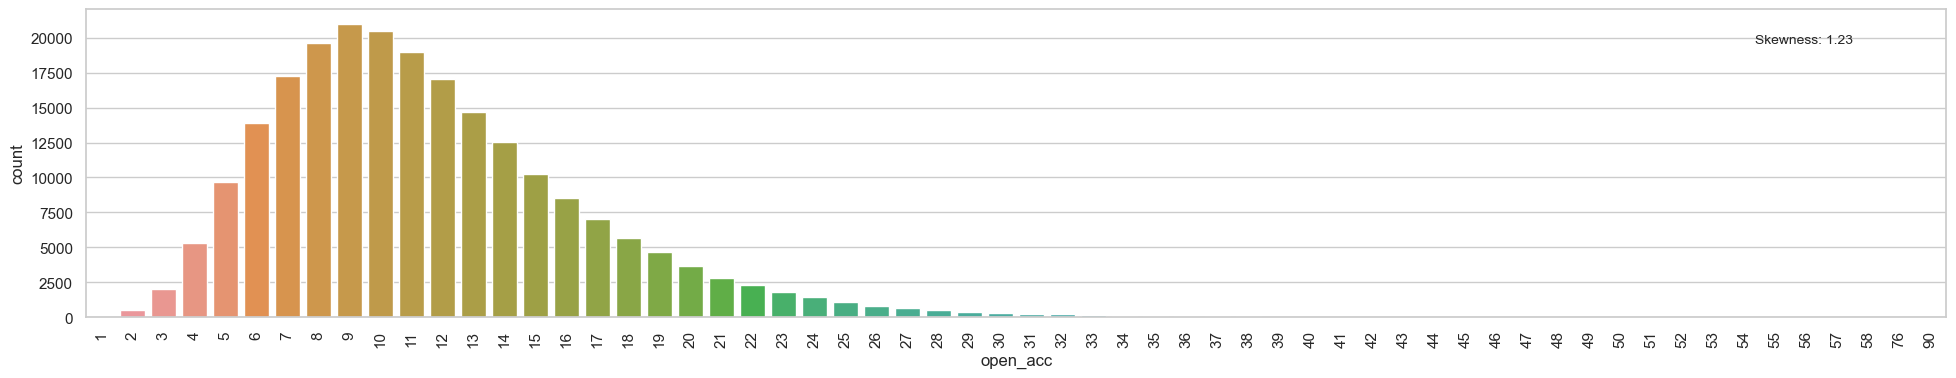

In [46]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)

sns.countplot(data=df_train, x='open_acc')

skewness = df_train['open_acc'].skew()

plt.text(0.95, 0.9, f'Skewness: {skewness:.2f}', ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)

Distribution is highly skewed > 1 to the right, there fore we remove try to remove outliers to make it less skewed

In [47]:
# try from 26, 30 , 35
num_above_35 = df_train[df_train['open_acc'] > 35].shape[0]

# Total number of people
total_people = df_train.shape[0]

# Calculate the percentage
percentage_above_35 = (num_above_35 / total_people) * 100

print("Percentage of people with open_acc greater than 35: {:.2f}%".format(percentage_above_35))

Percentage of people with open_acc greater than 35: 0.18%


In [48]:
df_train = df_train[df_train['open_acc'] <= 35]

<Axes: xlabel='open_acc', ylabel='count'>

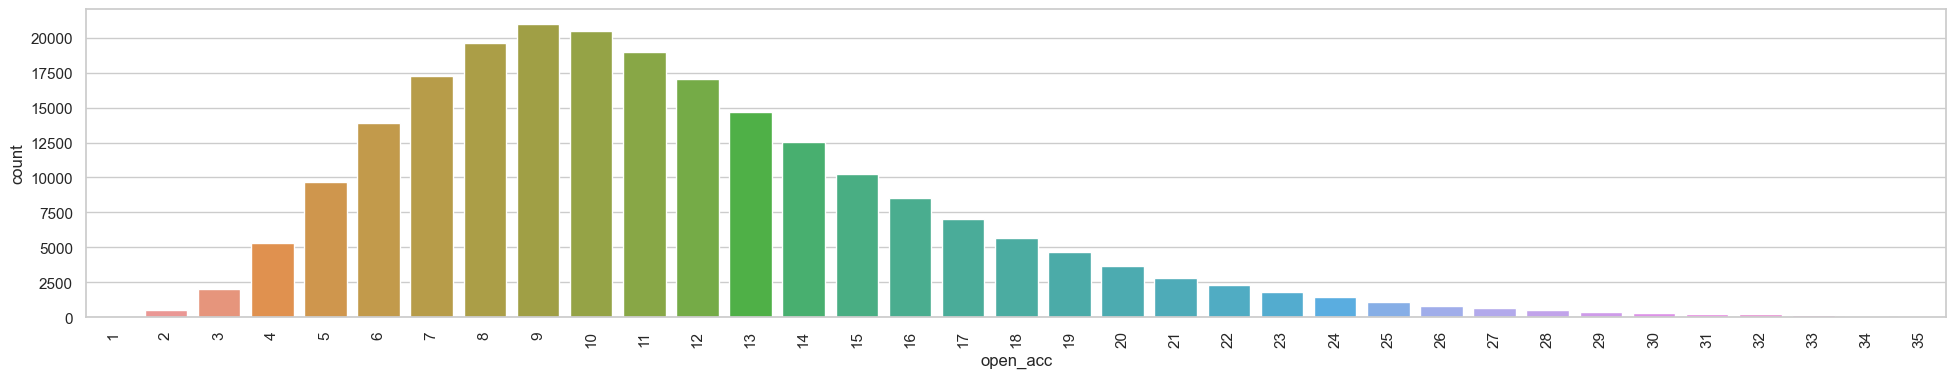

In [49]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
sns.countplot(data=df_train, x='open_acc')

In [50]:
df_train.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,44709.00,11.80,5.13,1.00,8.00,11.00,14.00,35.00
Fully Paid,181230.00,11.44,5.01,1.00,8.00,11.00,14.00,35.00


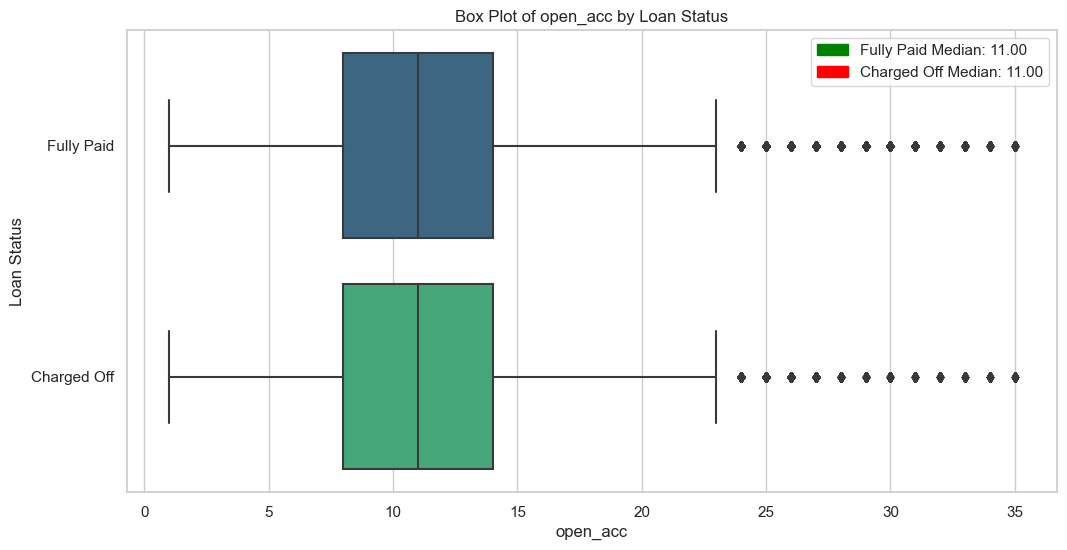

In [51]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, y='loan_status', x='open_acc', palette='viridis')

# Calculate medians
fully_paid_median = df_train[df_train['loan_status'] == 'Fully Paid']['open_acc'].median()
charged_off_median = df_train[df_train['loan_status'] == 'Charged Off']['open_acc'].median()

# Add median lines
fully_paid_legend = mpatches.Patch(color='green', label=f'Fully Paid Median: {fully_paid_median:.2f}')
charged_off_legend = mpatches.Patch(color='red', label=f'Charged Off Median: {charged_off_median:.2f}')
plt.legend(handles=[fully_paid_legend, charged_off_legend])

plt.xlabel('open_acc')
plt.ylabel('Loan Status')
plt.title('Box Plot of open_acc by Loan Status')
plt.show()

### 9. pub_rec

In [52]:
df_train['pub_rec'].describe()

count   225939.00
mean         0.19
std          0.56
min          0.00
25%          0.00
50%          0.00
75%          0.00
max         86.00
Name: pub_rec, dtype: float64

<Axes: xlabel='pub_rec', ylabel='count'>

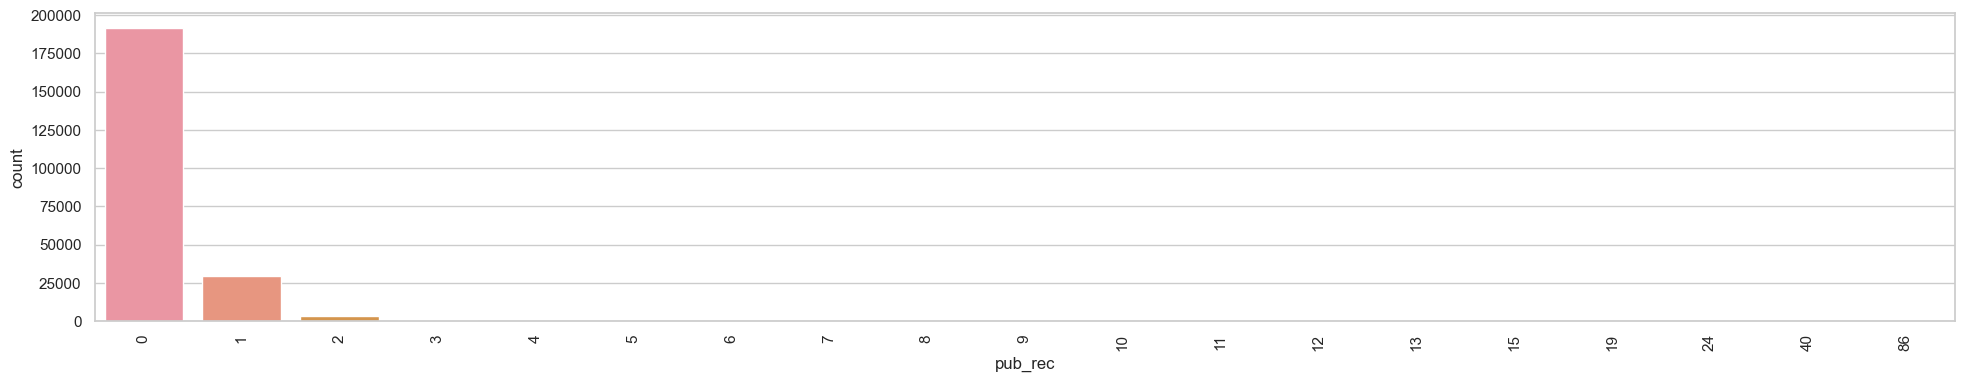

In [53]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
sns.countplot(data=df_train, x='pub_rec')

In [54]:
# try from 2
num_above_2 = df_train[df_train['pub_rec'] > 2].shape[0]

# Total number of people
total_people = df_train.shape[0]

# Calculate the percentage
percentage_above_2 = (num_above_2 / total_people) * 100

print("Percentage of people with pub_rec greater than 2: {:.2f}%".format(percentage_above_2))

Percentage of people with pub_rec greater than 2: 0.67%


In [55]:
df_train = df_train[df_train['pub_rec'] <= 2]

<Axes: xlabel='pub_rec', ylabel='count'>

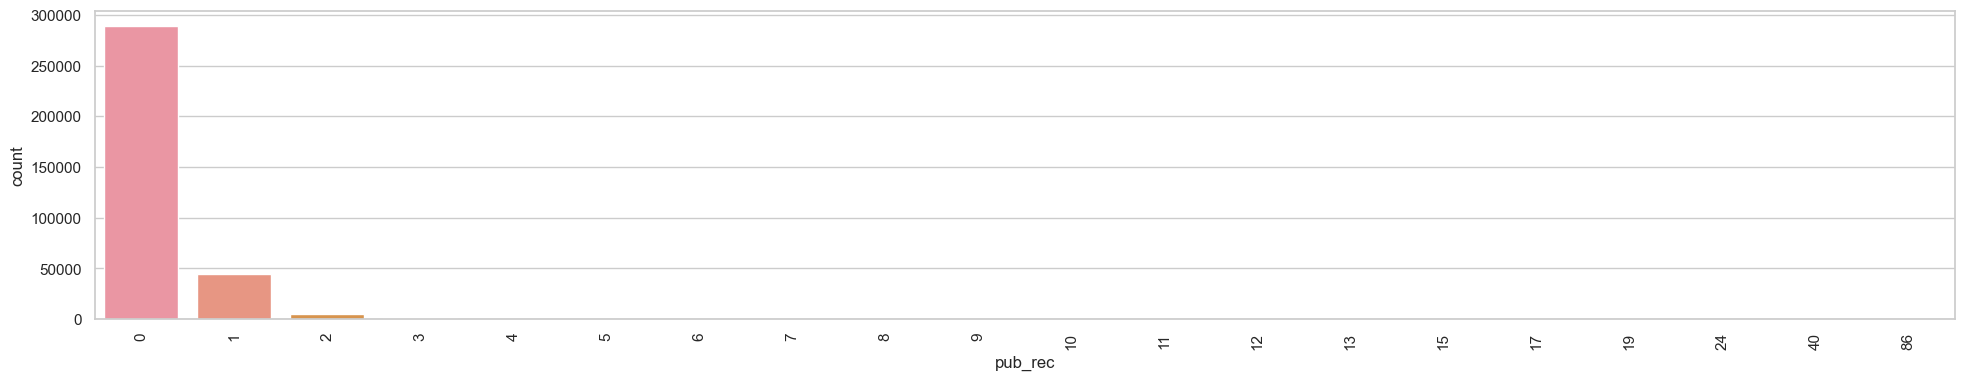

In [56]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
sns.countplot(data=df, x='pub_rec')

In [57]:
df_train.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,44350.00,0.17,0.42,0.00,0.00,0.00,0.00,2.00
Fully Paid,180071.00,0.16,0.40,0.00,0.00,0.00,0.00,2.00


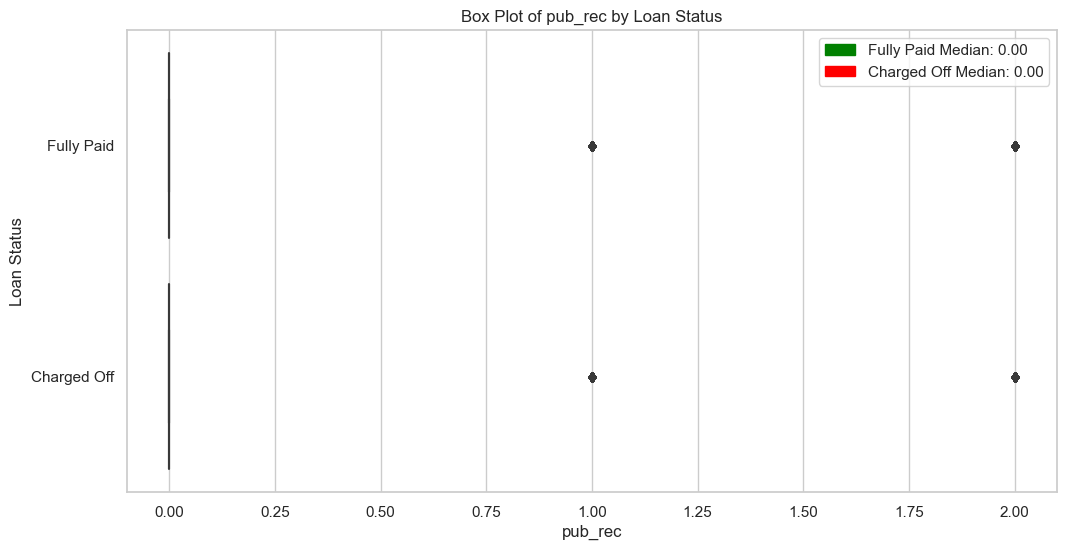

In [58]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, y='loan_status', x='pub_rec', palette='viridis')

# Calculate medians
fully_paid_median = df_train[df_train['loan_status'] == 'Fully Paid']['pub_rec'].median()
charged_off_median = df_train[df_train['loan_status'] == 'Charged Off']['pub_rec'].median()

# Add median lines
fully_paid_legend = mpatches.Patch(color='green', label=f'Fully Paid Median: {fully_paid_median:.2f}')
charged_off_legend = mpatches.Patch(color='red', label=f'Charged Off Median: {charged_off_median:.2f}')
plt.legend(handles=[fully_paid_legend, charged_off_legend])
plt.xlabel('pub_rec')
plt.ylabel('Loan Status')
plt.title('Box Plot of pub_rec by Loan Status')
plt.show()

### 10. revol_bal

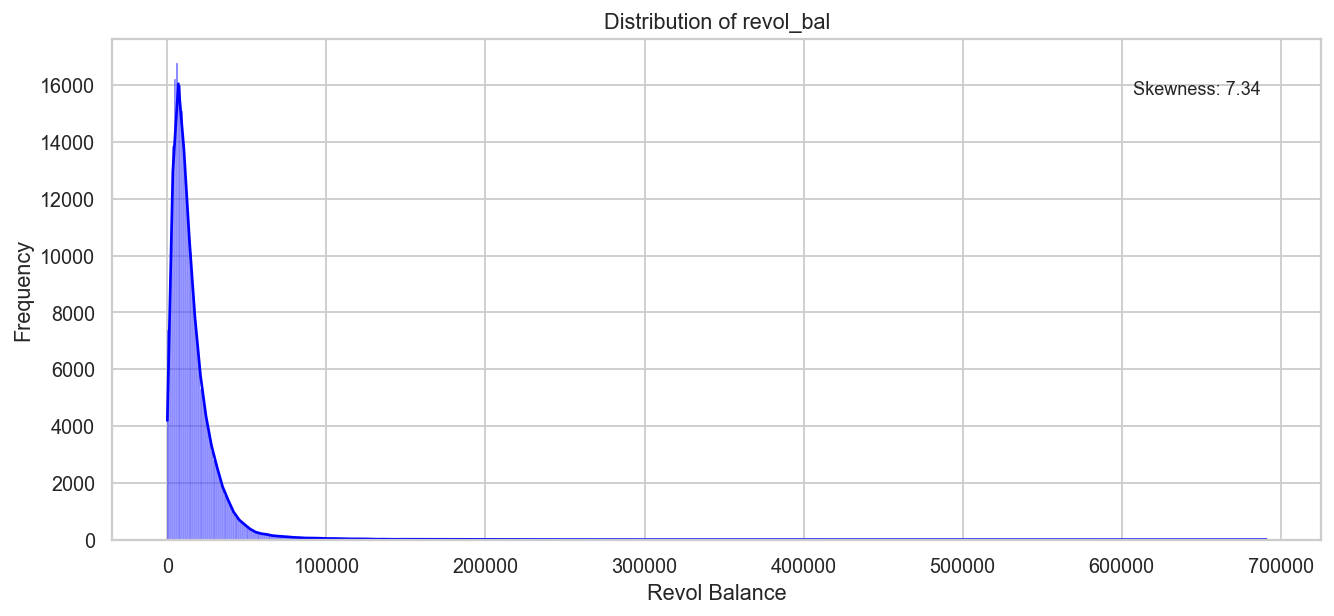

In [60]:
# Distribution of revol_bal
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5), dpi =130)

# Plot the distribution of revol_bal 
sns.histplot(df_train['revol_bal'],bins =500, kde= True,color='blue')

skewness = df_train['revol_bal'].skew()

plt.text(0.95, 0.9, f'Skewness: {skewness:.2f}', ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)

# Add labels and title
plt.xlabel('Revol Balance')
plt.ylabel('Frequency')
plt.title('Distribution of revol_bal')

# Show the plot
plt.show()

The revol_bal distribution is highly skewed towards right. skew > 7

In [61]:
pd.options.display.float_format = '{:.2f}'.format
description = df_train['revol_bal'].describe()
print(description)

count   224421.00
mean     15811.70
std      18167.39
min          0.00
25%       6292.00
50%      11432.00
75%      19878.00
max     690987.00
Name: revol_bal, dtype: float64


In [62]:
num_above_150k = df_train[df_train['revol_bal'] > 150000].shape[0]

# Total number of people
total_people = df_train.shape[0]

# Calculate the percentage
percentage_above_150k = (num_above_150k / total_people) * 100

print("Percentage of people with revol_bal greater than 150k: {:.2f}%".format(percentage_above_150k))

Percentage of people with revol_bal greater than 150k: 0.27%


In [63]:
df_train = df_train[df_train['revol_bal'] <= 150000]

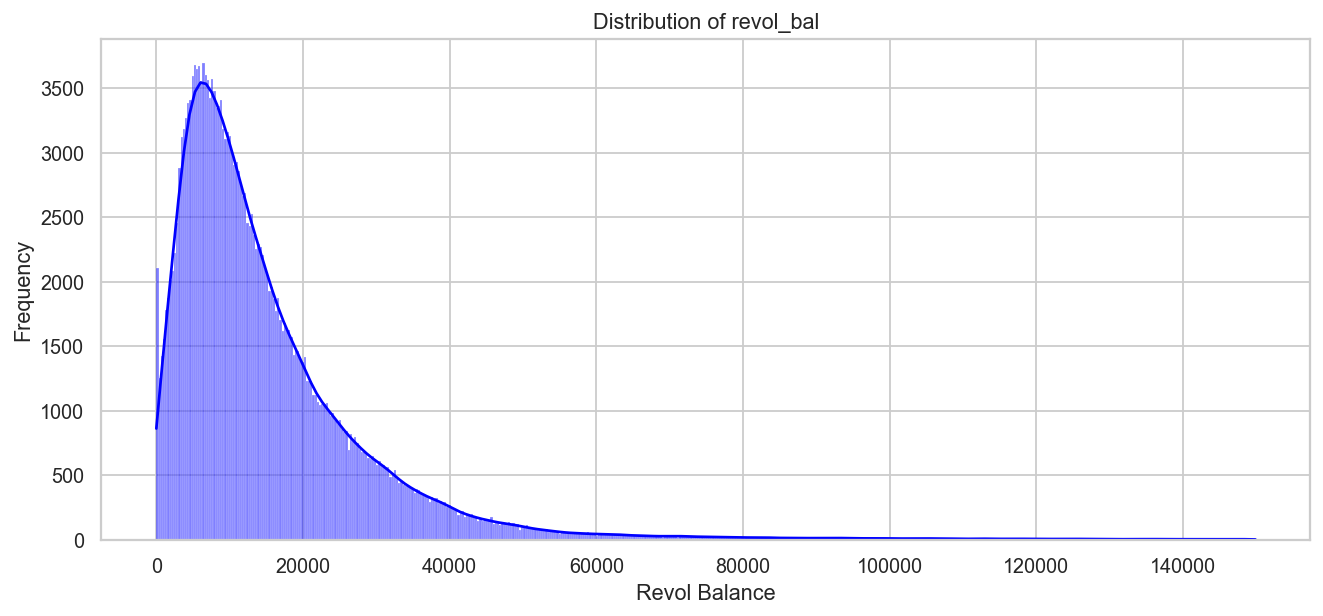

In [64]:
# Distribution of revol_bal
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5), dpi =130)

# Plot the distribution of revol_bal
sns.histplot(df_train['revol_bal'],bins =500, kde= True,color='blue')



# Add labels and title
plt.xlabel('Revol Balance')
plt.ylabel('Frequency')
plt.title('Distribution of revol_bal')

# Show the plot
plt.show()

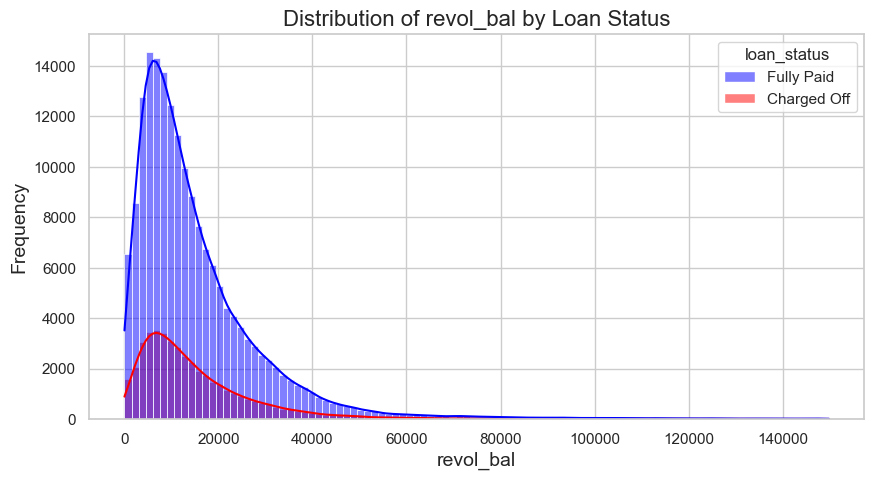

In [65]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(data=df_train, x='revol_bal', hue='loan_status', bins=100, kde=True, palette= {'Charged Off': 'red', 'Fully Paid': 'blue'})

# Customize the plot further
plt.xlabel('revol_bal', fontsize=14 )
plt.ylabel('Frequency', fontsize=14, )
plt.title('Distribution of revol_bal by Loan Status', fontsize=16, )

# Show plot
plt.show()

In [66]:
df_train.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,44272.00,15096.15,13548.41,0.00,6363.00,11493.00,19758.25,148193.00
Fully Paid,179552.00,15304.65,14374.46,0.00,6258.00,11372.00,19785.00,149893.00


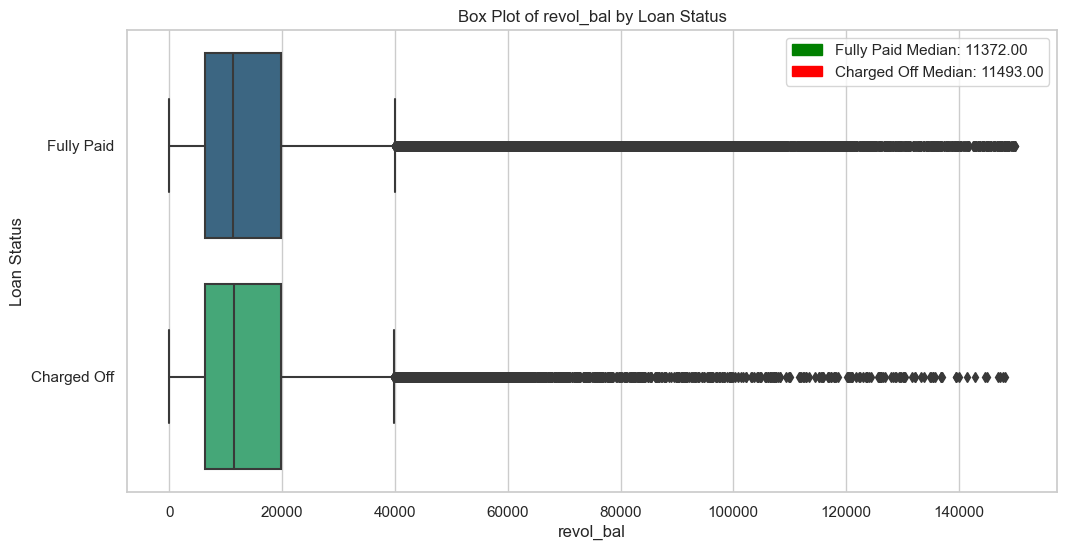

In [67]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, y='loan_status', x='revol_bal', palette='viridis')

# Calculate medians
fully_paid_median = df_train[df_train['loan_status'] == 'Fully Paid']['revol_bal'].median()
charged_off_median = df_train[df_train['loan_status'] == 'Charged Off']['revol_bal'].median()

# Add median lines
fully_paid_legend = mpatches.Patch(color='green', label=f'Fully Paid Median: {fully_paid_median:.2f}')
charged_off_legend = mpatches.Patch(color='red', label=f'Charged Off Median: {charged_off_median:.2f}')
plt.legend(handles=[fully_paid_legend, charged_off_legend])
plt.xlabel('revol_bal')
plt.ylabel('Loan Status')
plt.title('Box Plot of revol_bal by Loan Status')
plt.show()

lower the the revol balance higher the chance of charge off

### 11. revol_util

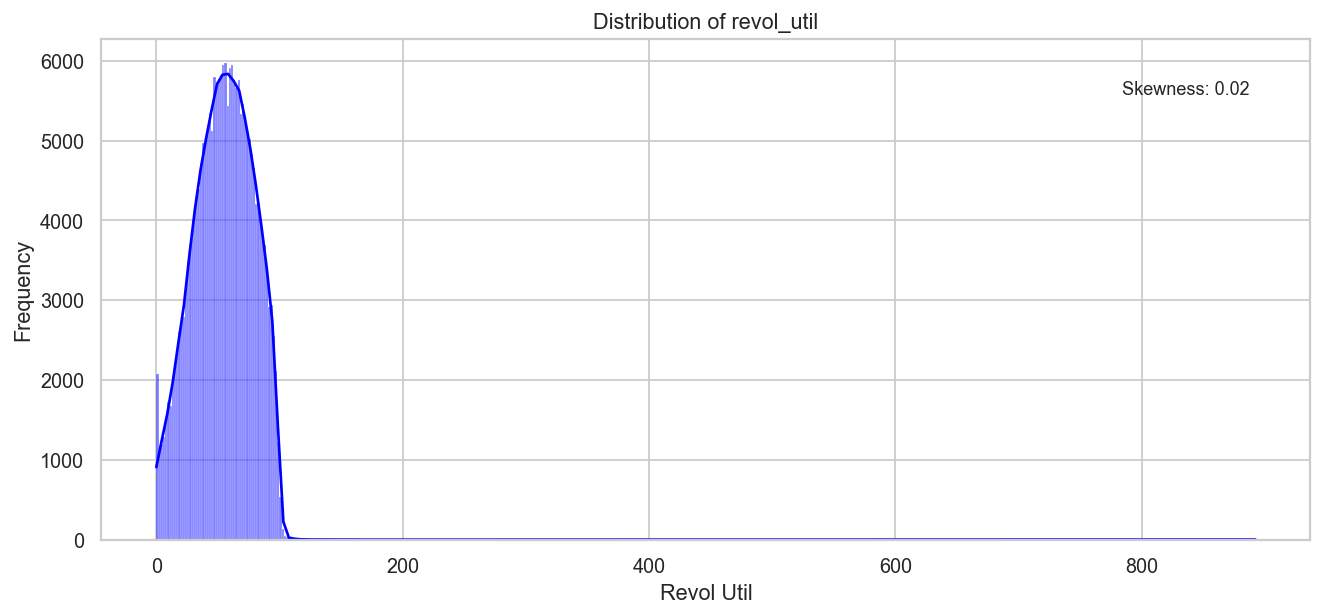

In [68]:
# Distribution of revol_util
sns.set(style="whitegrid")
plt.figure(figsize=(12, 5), dpi =130)

# Plot the distribution of revol_util
sns.histplot(df_train['revol_util'],bins =500, kde= True,color='blue')

skewness = df_train['revol_util'].skew()

plt.text(0.95, 0.9, f'Skewness: {skewness:.2f}', ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)

# Add labels and title
plt.xlabel('Revol Util')
plt.ylabel('Frequency')
plt.title('Distribution of revol_util')

# Show the plot
plt.show()

The revol_bal distribution is highly skewed towards right.

In [69]:
num_above_120 = df_train[df_train['revol_util'] > 120].shape[0]

# Total number of people
total_people = df_train.shape[0]

# Calculate the percentage
percentage_above_120 = (num_above_120 / total_people) * 100

print("Percentage of people with revol_util greater than 120: {:.2f}%".format(percentage_above_120))


Percentage of people with revol_util greater than 120: 0.01%


In [70]:
pd.options.display.float_format = '{:.2f}'.format
description = df_train['revol_util'].describe()
print(description)

count   223824.00
mean        54.42
std         23.94
min          0.00
25%         37.00
50%         55.40
75%         73.00
max        892.30
Name: revol_util, dtype: float64


In [71]:
df_train = df_train[df_train['revol_util'] <= 120]

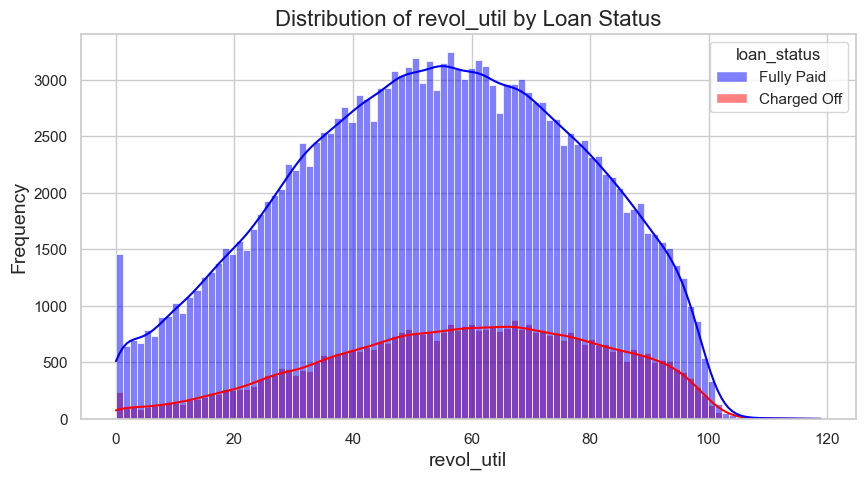

In [72]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(data=df_train, x='revol_util', hue='loan_status', bins=100, kde=True, palette= {'Charged Off': 'red', 'Fully Paid': 'blue'})

# Customize the plot further
plt.xlabel('revol_util', fontsize=14 )
plt.ylabel('Frequency', fontsize=14, )
plt.title('Distribution of revol_util by Loan Status', fontsize=16, )

# Show plot
plt.show()

much better

In [73]:
df_train.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,44266.00,58.21,23.10,0.00,42.00,59.60,76.20,117.20
Fully Paid,179542.00,53.47,23.96,0.00,35.80,54.30,72.00,118.90


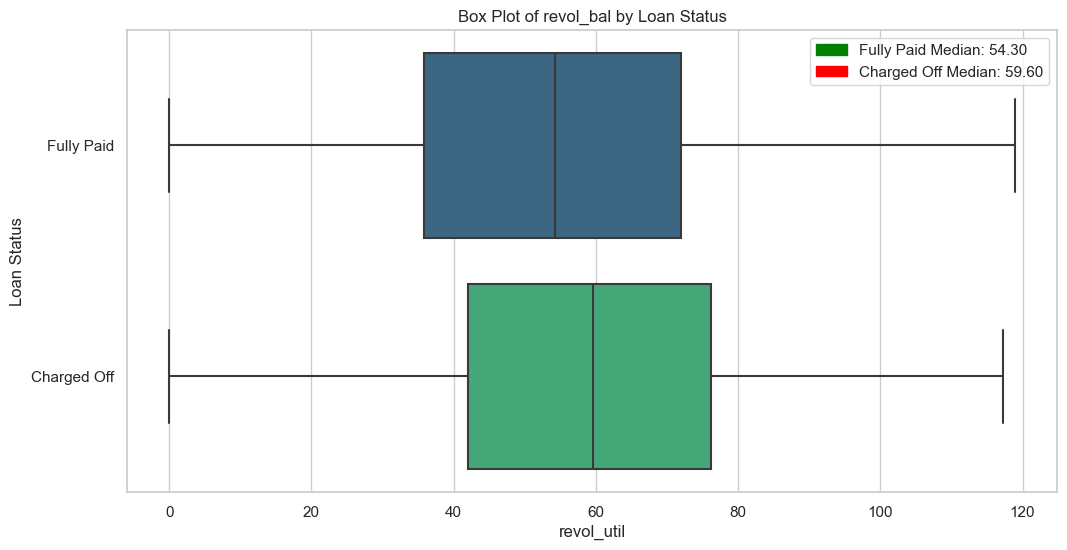

In [74]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, y='loan_status', x='revol_util', palette='viridis')

# Calculate medians
fully_paid_median = df_train[df_train['loan_status'] == 'Fully Paid']['revol_util'].median()
charged_off_median = df_train[df_train['loan_status'] == 'Charged Off']['revol_util'].median()

# Add median lines
fully_paid_legend = mpatches.Patch(color='green', label=f'Fully Paid Median: {fully_paid_median:.2f}')
charged_off_legend = mpatches.Patch(color='red', label=f'Charged Off Median: {charged_off_median:.2f}')
plt.legend(handles=[fully_paid_legend, charged_off_legend])
plt.xlabel('revol_util')
plt.ylabel('Loan Status')
plt.title('Box Plot of revol_bal by Loan Status')
plt.show()

higher the revol_util higher the chance for charged off

### 12. total_acc

In [75]:
df_train['total_acc'].describe()

count   223808.00
mean        25.68
std         11.76
min          2.00
25%         17.00
50%         24.00
75%         33.00
max        151.00
Name: total_acc, dtype: float64

<Axes: xlabel='total_acc', ylabel='count'>

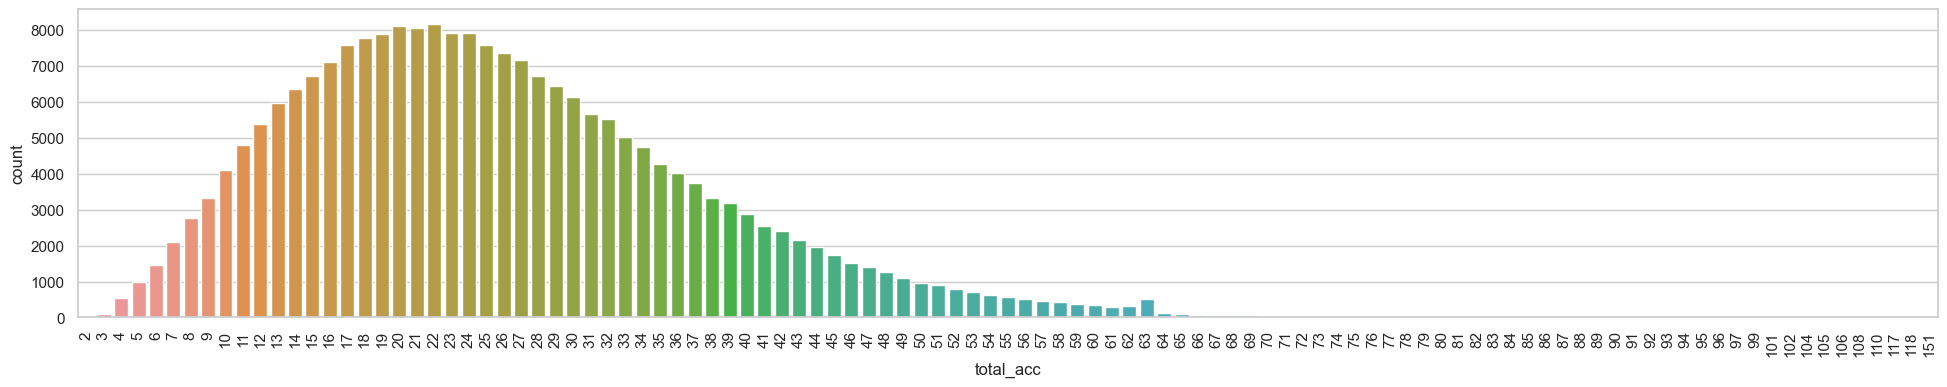

In [78]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
sns.countplot(data=df_train, x='total_acc')

Distribution is skewed to the right, there fore we remove try to remove outliers to make it less skewed

In [79]:
# try from 63
num_above_75 = df_train[df_train['total_acc'] > 75].shape[0]

# Total number of people
total_people = df_train.shape[0]

# Calculate the percentage
percentage_above_75 = (num_above_75 / total_people) * 100

print("Percentage of people with total accounts greater than 75: {:.2f}%".format(percentage_above_75))

Percentage of people with total accounts greater than 75: 0.10%


Lets drop all records where the total_acc is > 75

In [80]:
df_train = df_train[df_train['total_acc'] <= 75]

<Axes: xlabel='total_acc', ylabel='count'>

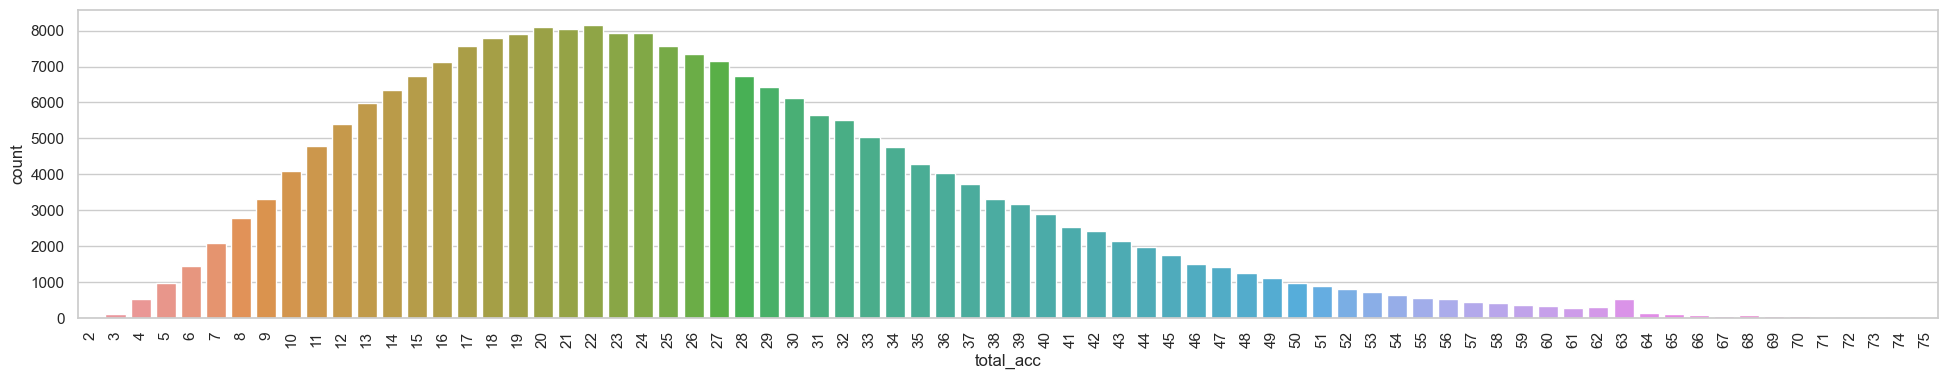

In [81]:
plt.figure(figsize=(24,4))
plt.xticks(rotation=90)
sns.countplot(data=df_train, x='total_acc')

Much Better

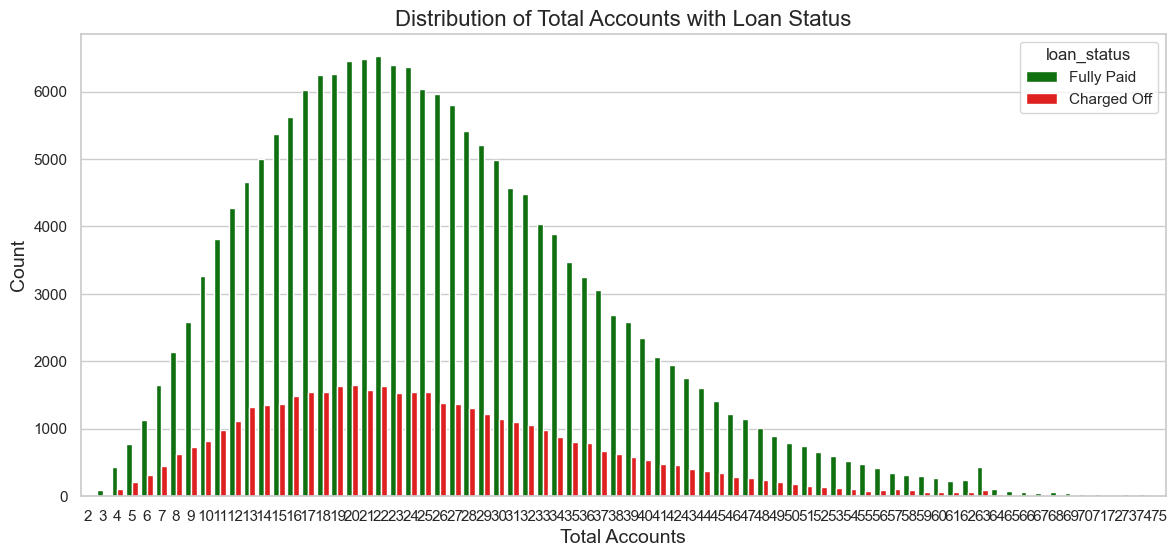

In [82]:
color_palette =  {'Charged Off': 'red', 'Fully Paid': 'green'} 

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.countplot(x='total_acc', data=df_train, hue='loan_status', palette=color_palette)

plt.xlabel('Total Accounts', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Total Accounts with Loan Status', fontsize=16)

plt.show()

In [83]:
df_train.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,44217.00,25.18,11.59,2.00,17.00,24.00,32.00,75.00
Fully Paid,179374.00,25.73,11.62,2.00,17.00,24.00,33.00,75.00


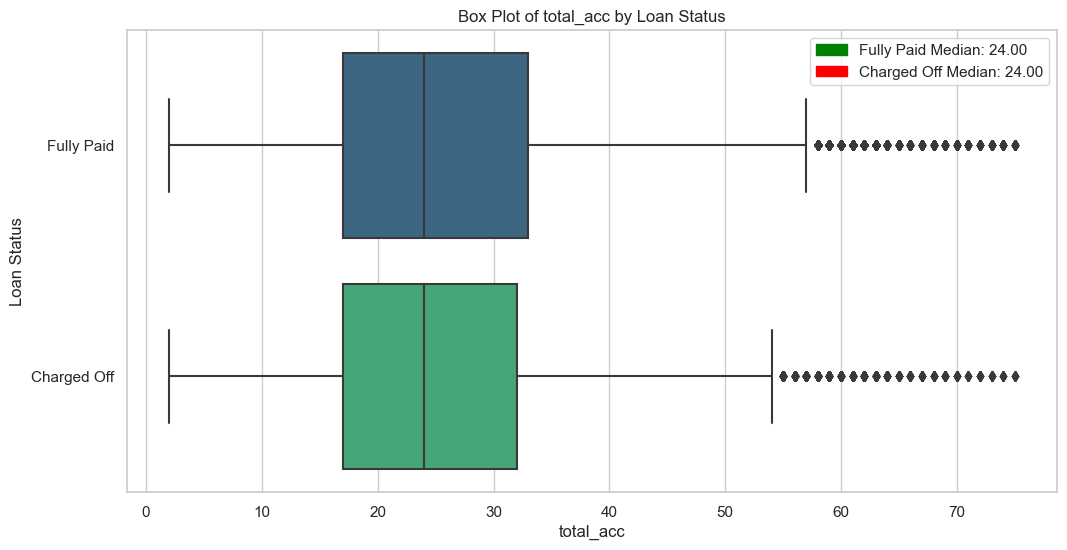

In [84]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, y='loan_status', x='total_acc', palette='viridis')

# Calculate medians
fully_paid_median = df_train[df_train['loan_status'] == 'Fully Paid']['total_acc'].median()
charged_off_median = df_train[df_train['loan_status'] == 'Charged Off']['total_acc'].median()

# Add median lines
fully_paid_legend = mpatches.Patch(color='green', label=f'Fully Paid Median: {fully_paid_median:.2f}')
charged_off_legend = mpatches.Patch(color='red', label=f'Charged Off Median: {charged_off_median:.2f}')
plt.legend(handles=[fully_paid_legend, charged_off_legend])
plt.xlabel('total_acc')
plt.ylabel('Loan Status')
plt.title('Box Plot of total_acc by Loan Status')
plt.show()

### 13. mort_acc

In [85]:
df_train['mort_acc'].describe()

count   223591.00
mean         1.78
std          2.12
min          0.00
25%          0.00
50%          1.00
75%          3.00
max         32.00
Name: mort_acc, dtype: float64

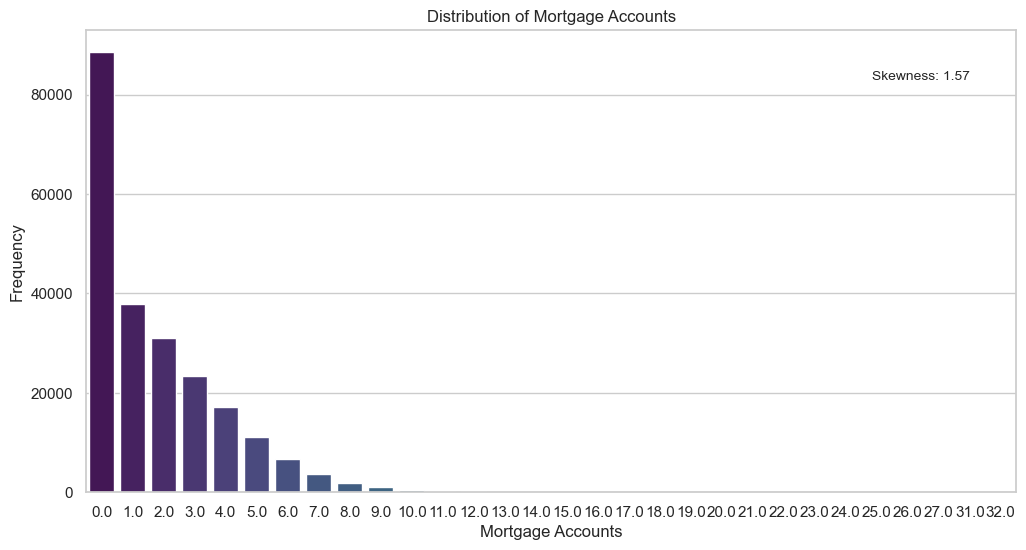

In [87]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_train, x='mort_acc', palette='viridis')

skewness = df_train['mort_acc'].skew()

plt.text(0.95, 0.9, f'Skewness: {skewness:.2f}', ha='right', va='center', transform=plt.gca().transAxes, fontsize=10)

plt.xlabel('Mortgage Accounts')
plt.ylabel('Frequency')
plt.title('Distribution of Mortgage Accounts')
plt.show()

Mortgage accounts is highly skewed from the right side. In order to handle this we will remove the outliers

In [88]:
# checked for 10, 9, 8 = 0.68% , 7 = 1.30 # Lets remove 8 and 
num_above_8 = df_train[df_train['mort_acc'] > 8].shape[0]

# Total number of people
total_people = df_train.shape[0]

# Calculate the percentage
percentage_above_8 = (num_above_8 / total_people) * 100

print("Percentage of people with mortgage accounts greater than 8: {:.2f}%".format(percentage_above_8))

Percentage of people with mortgage accounts greater than 8: 0.97%


In [89]:
df_train = df_train[df_train['mort_acc'] < 9]

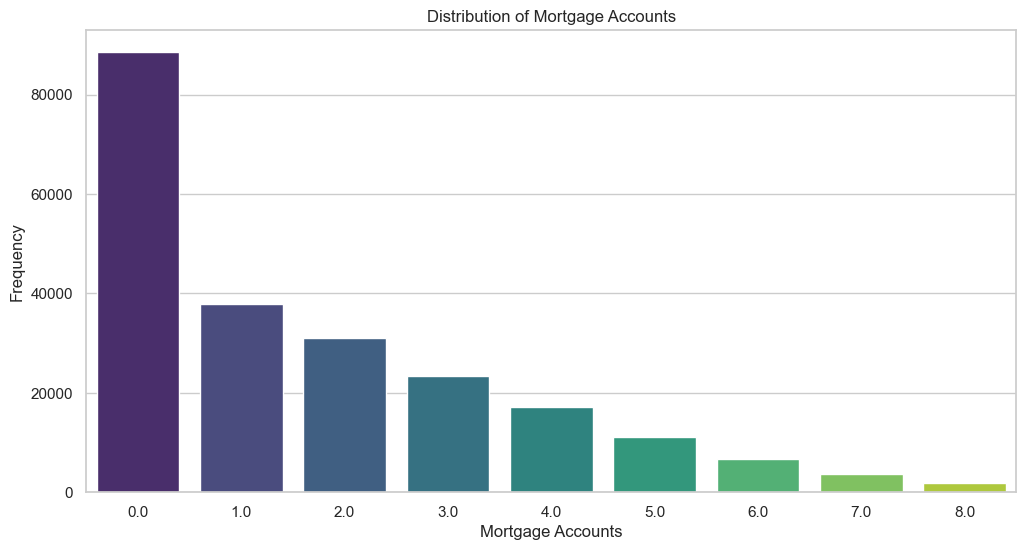

In [90]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_train, x='mort_acc', palette='viridis')
plt.xlabel('Mortgage Accounts')
plt.ylabel('Frequency')
plt.title('Distribution of Mortgage Accounts')
plt.show()

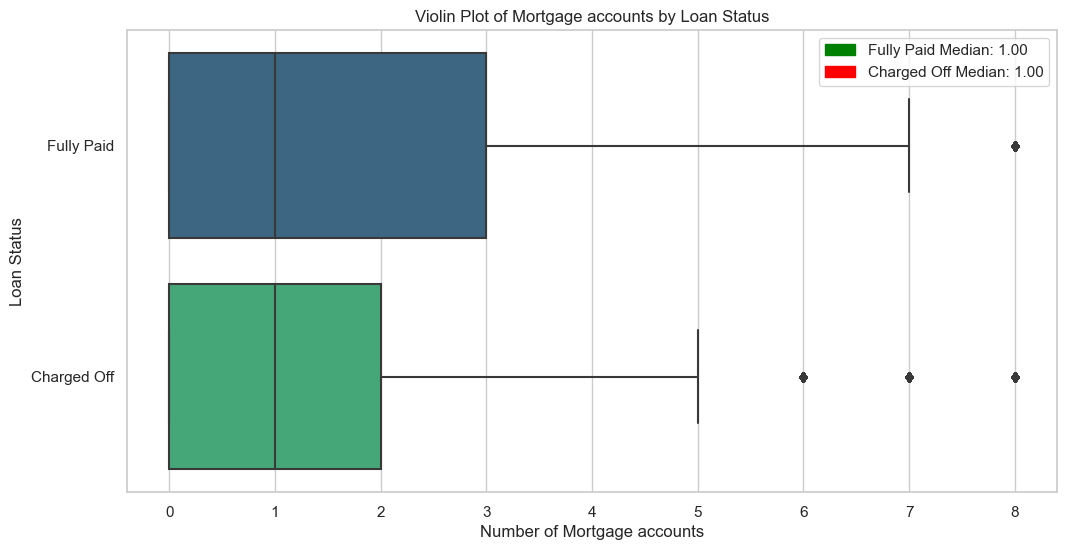

In [91]:
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, y='loan_status', x='mort_acc', palette='viridis')

# Calculate medians
fully_paid_median = df_train[df_train['loan_status'] == 'Fully Paid']['mort_acc'].median()
charged_off_median = df_train[df_train['loan_status'] == 'Charged Off']['mort_acc'].median()

# Add median lines
fully_paid_legend = mpatches.Patch(color='green', label=f'Fully Paid Median: {fully_paid_median:.2f}')
charged_off_legend = mpatches.Patch(color='red', label=f'Charged Off Median: {charged_off_median:.2f}')
plt.legend(handles=[fully_paid_legend, charged_off_legend])

plt.xlabel('Number of Mortgage accounts')
plt.ylabel('Loan Status')
plt.title('Violin Plot of Mortgage accounts by Loan Status')
plt.show()

Not very clear, though the median is same...I intend to keep it for further analysisa

### 14. pub_rec_bankruptcies

In [92]:
numeric_columns = df_train.select_dtypes(include=[np.number])
correlation_values = abs(numeric_columns.corr()['pub_rec_bankruptcies']).sort_values(ascending=False)[1:5]
display(correlation_values)

pub_rec       0.83
revol_bal     0.17
loan_amnt     0.11
installment   0.11
Name: pub_rec_bankruptcies, dtype: float64

The correlation has increase with further cleaning and preprocessing

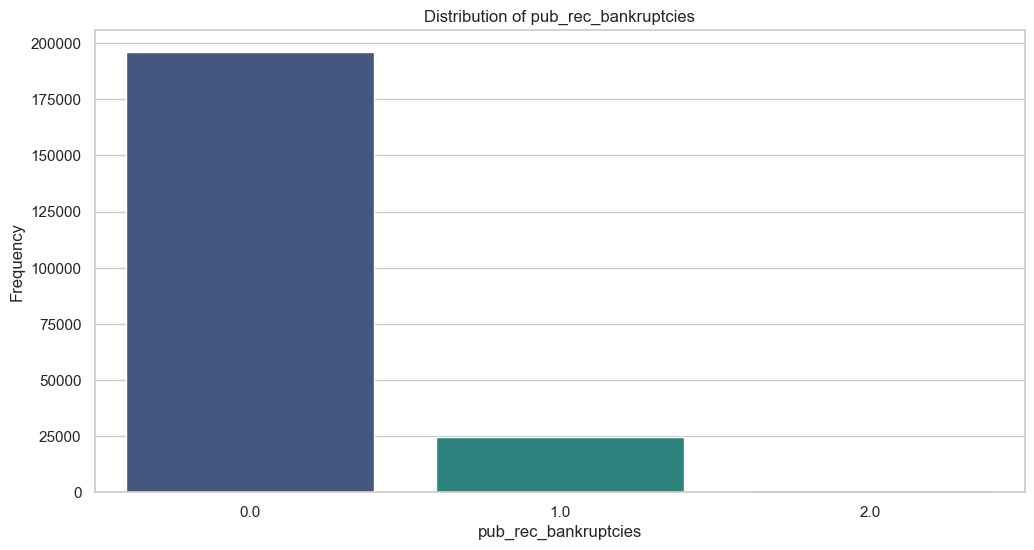

In [93]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_train, x='pub_rec_bankruptcies', palette='viridis')
plt.xlabel('pub_rec_bankruptcies')
plt.ylabel('Frequency')
plt.title('Distribution of pub_rec_bankruptcies')
plt.show()

Dropping pub_rec_bankruptcies as it is highly correlated to pub_rec

In [94]:
df_train = df_train.drop('pub_rec_bankruptcies', axis=1)
df_test = df_test.drop('pub_rec_bankruptcies', axis=1)

### 15. term

<Axes: xlabel='term (months)', ylabel='count'>

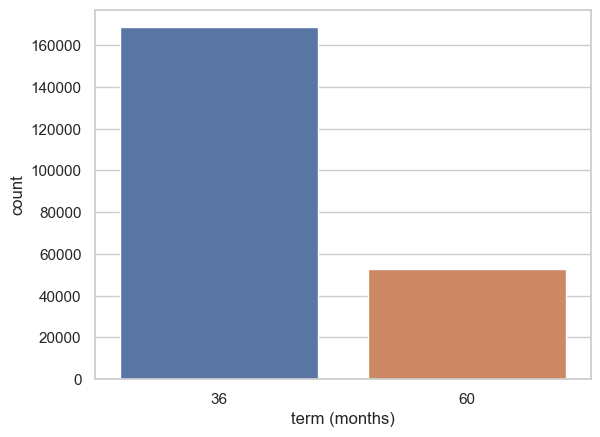

In [95]:
sns.countplot(data=df_train, x='term (months)')



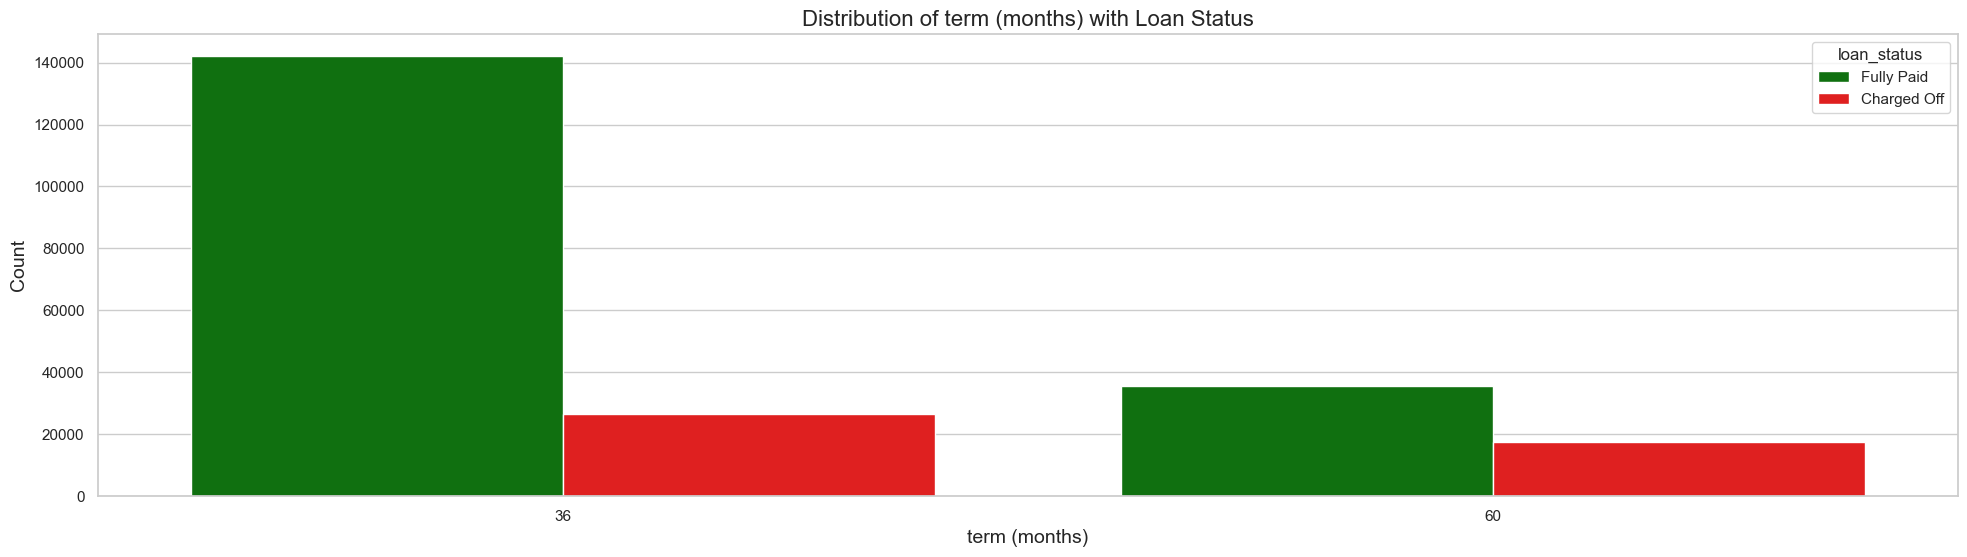

In [96]:
color_palette =  {'Charged Off': 'red', 'Fully Paid': 'green'} 
term_order = sorted(df_train['term (months)'].unique())
sns.set(style="whitegrid")
plt.figure(figsize=(24, 6))

sns.countplot(x='term (months)', data=df_train, order=term_order, hue='loan_status', palette=color_palette)

plt.xlabel('term (months)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of term (months) with Loan Status', fontsize=16)

plt.show()

In [97]:
charged_off_counts = df_train[df_train['loan_status'] == "Charged Off"].groupby("term (months)").size()
fully_paid_counts = df_train[df_train['loan_status'] == "Fully Paid"].groupby("term (months)").size()
charged_off_percentage = (charged_off_counts * 100) / (charged_off_counts + fully_paid_counts)
result_df_train = pd.DataFrame({'term (months)': charged_off_percentage.index, 'Percentage Charged Off': charged_off_percentage.values})
result_df_train.reset_index(drop=True, inplace=True)
display(result_df_train)


,term (months),Percentage Charged Off
0,36,15.73
1,60,32.93


In [98]:
df_train.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,43928.00,16.10,4.38,5.32,12.99,15.80,18.92,29.96
Fully Paid,177493.00,13.24,4.35,5.32,9.99,12.99,15.80,30.99


### 16. sub_grade

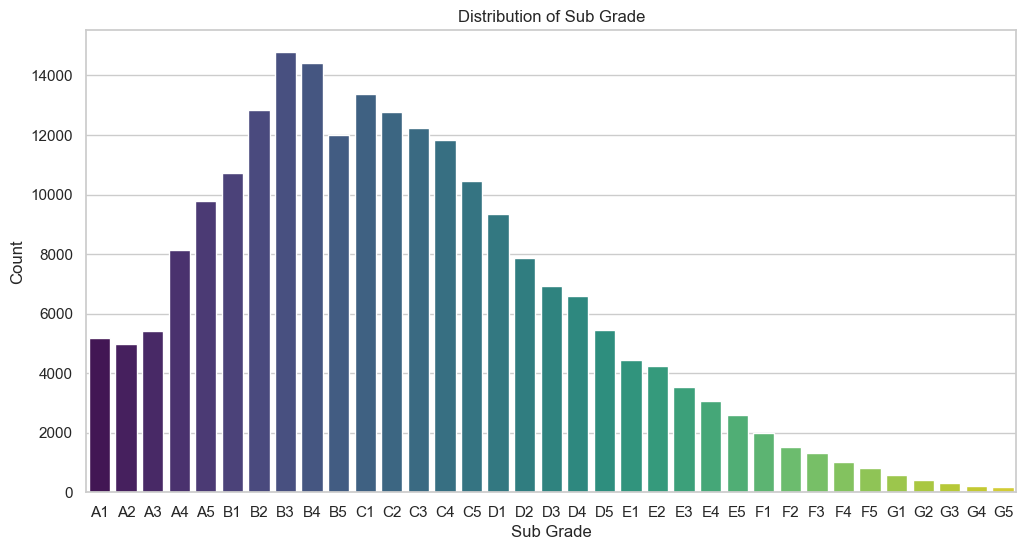

In [99]:
# Distibution of sub_grade

subgrade_order = sorted(df_train['sub_grade'].unique())

color_palette = sns.color_palette("viridis", len(subgrade_order))

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(x='sub_grade', data=df_train, order=subgrade_order, palette=color_palette)

plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.title('Distribution of Sub Grade')


plt.show()

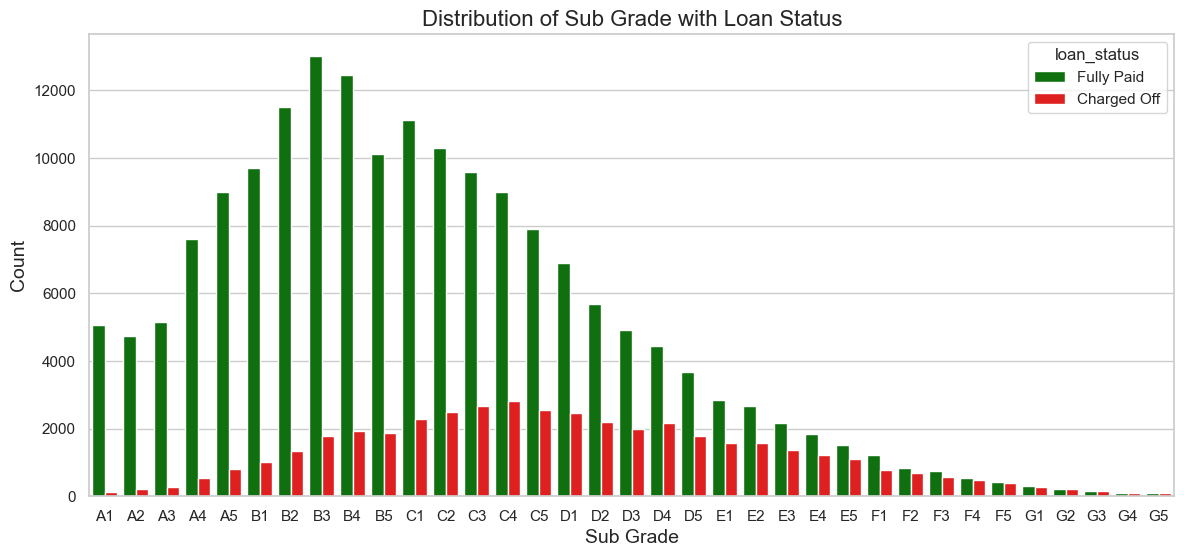

In [100]:
color_palette =  {'Charged Off': 'red', 'Fully Paid': 'green'} 

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.countplot(x='sub_grade', data=df_train, order=subgrade_order, hue='loan_status', palette=color_palette)

plt.xlabel('Sub Grade', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Sub Grade with Loan Status', fontsize=16)

plt.show()

It appears that loans associated with F and G subgrades have a lower rate of repayment. Let's focus on these subgrades and create a countplot specifically for them to gain further insight.

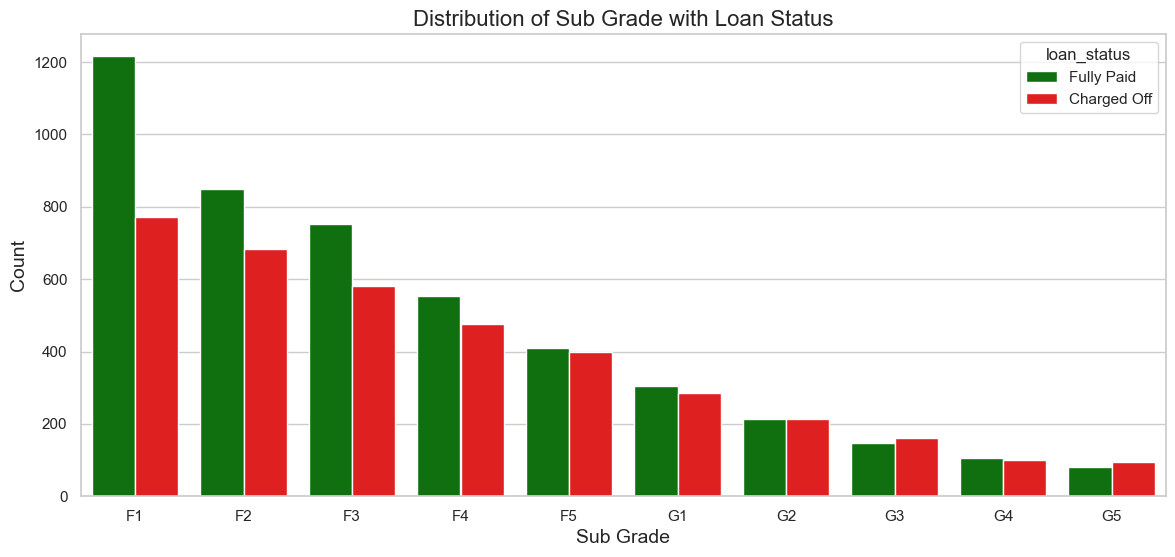

In [101]:
subgrade_order_f_g = sorted(df_train[df_train['sub_grade'].str.startswith(('F', 'G'))]['sub_grade'].unique())
color_palette =  {'Charged Off': 'red', 'Fully Paid': 'green'} 

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.countplot(x='sub_grade', data=df_train, order=subgrade_order_f_g, hue='loan_status', palette=color_palette)

plt.xlabel('Sub Grade', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Sub Grade with Loan Status', fontsize=16)

plt.show()

Here we can clearly see that as subgrade progresses chance of getting paid back is lower. There is a pattern so we reatin this categorical variable

### 17. emp_length

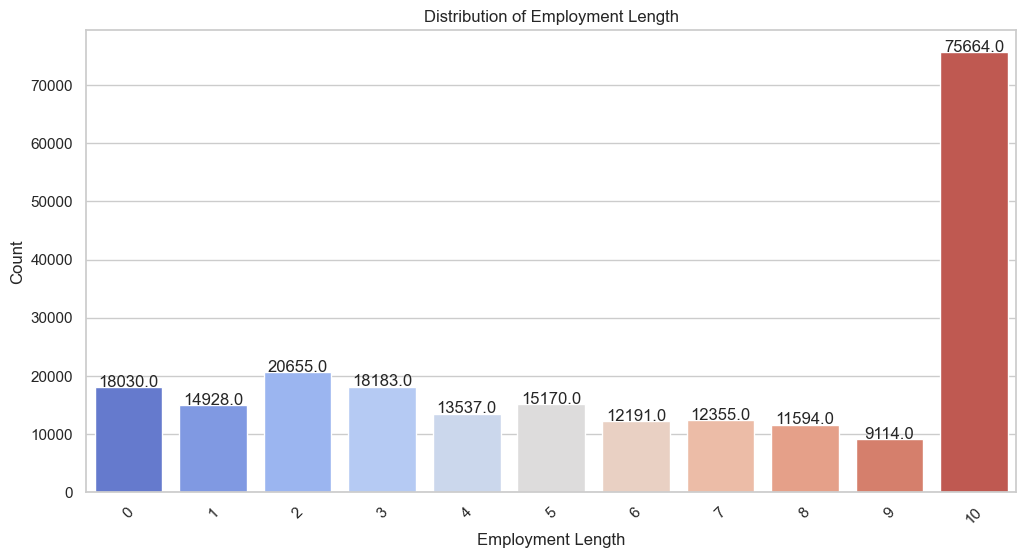

In [102]:
# Distibution of emp_length

emp_length_order = [i for i in range(0, 11)]

color_palette = sns.color_palette("coolwarm", len(emp_length_order))

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(x='emp_length', data=df_train, order=emp_length_order, palette=color_palette)

plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Distribution of Employment Length')

# Rotating the x-axis labels 
plt.xticks(rotation=45)

# We need to annotate the bars with their counts
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height() + 100), ha='center')

plt.show()

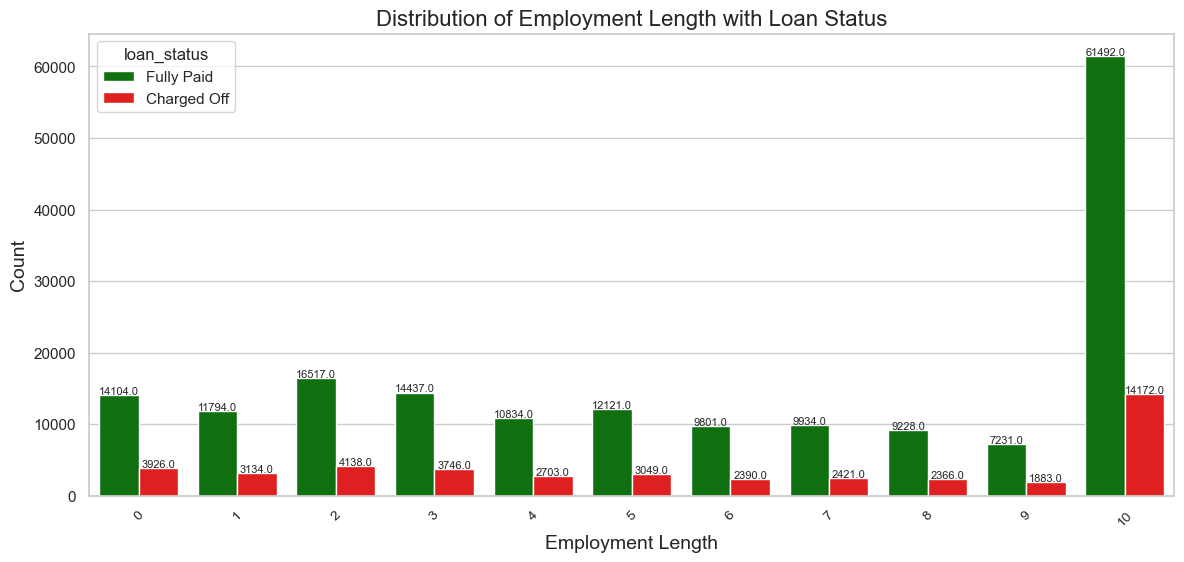

In [103]:
color_palette =  {'Charged Off': 'red', 'Fully Paid': 'green'} 

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.countplot(x='emp_length', data=df_train, order=emp_length_order, hue='loan_status', palette=color_palette)

plt.xlabel('Employment Length', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Employment Length with Loan Status', fontsize=16)

plt.xticks(rotation=45, fontsize=10)  

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height() + 100), ha='center', fontsize=8)

plt.show()

This does not show any pattern across different cateegories i.e the length of employment. So to get a better understanding lets see how % of people caharged of based on emp_length

In [104]:
charged_off_counts = df_train[df_train['loan_status'] == "Charged Off"].groupby("emp_length").size()
fully_paid_counts = df_train[df_train['loan_status'] == "Fully Paid"].groupby("emp_length").size()
charged_off_percentage = (charged_off_counts * 100) / (charged_off_counts + fully_paid_counts)
result_df_train = pd.DataFrame({'Employment Length': charged_off_percentage.index, 'Percentage Charged Off': charged_off_percentage.values})
result_df_train.reset_index(drop=True, inplace=True)
display(result_df_train)


,Employment Length,Percentage Charged Off
0,0.00,21.77
1,1.00,20.99
2,2.00,20.03
3,3.00,20.60
4,4.00,19.97
5,5.00,20.10
6,6.00,19.60
7,7.00,19.60
8,8.00,20.41
9,9.00,20.66


Again from this we can see that there is no particular pattern which affects the loan status. Therefore we drop this off

In [105]:
df_train = df_train.drop('emp_length', axis=1)
df_test = df_test.drop('emp_length', axis=1)

### 18. home_ownership

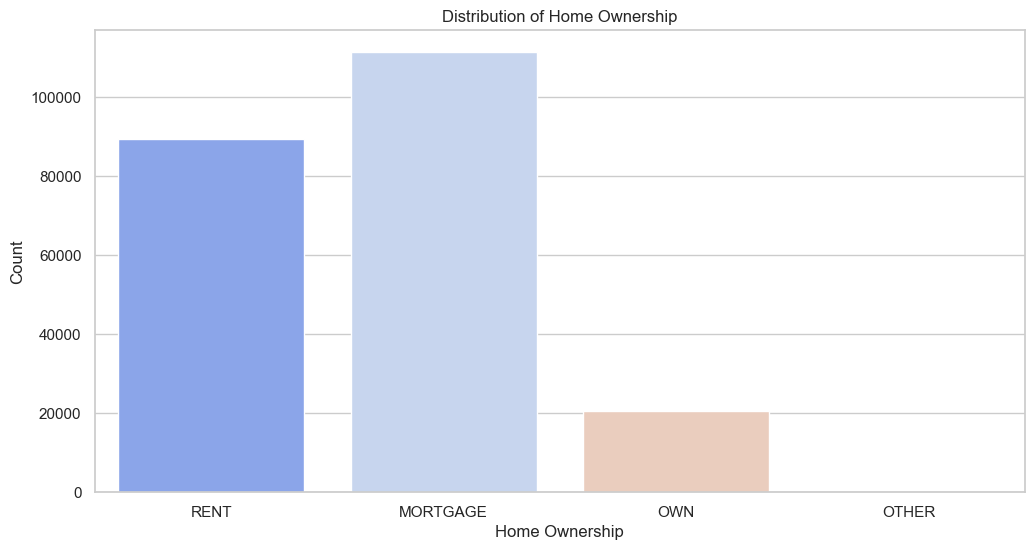

In [106]:
# Distibution of home_ownership

color_palette = sns.color_palette("coolwarm", len(df_train['home_ownership'].unique()))

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(x='home_ownership', data=df_train, palette=color_palette)

plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership')


plt.show()

In [107]:
df_train['home_ownership'].value_counts()

home_ownership
MORTGAGE    111395
RENT         89518
OWN          20471
OTHER           37
Name: count, dtype: int64

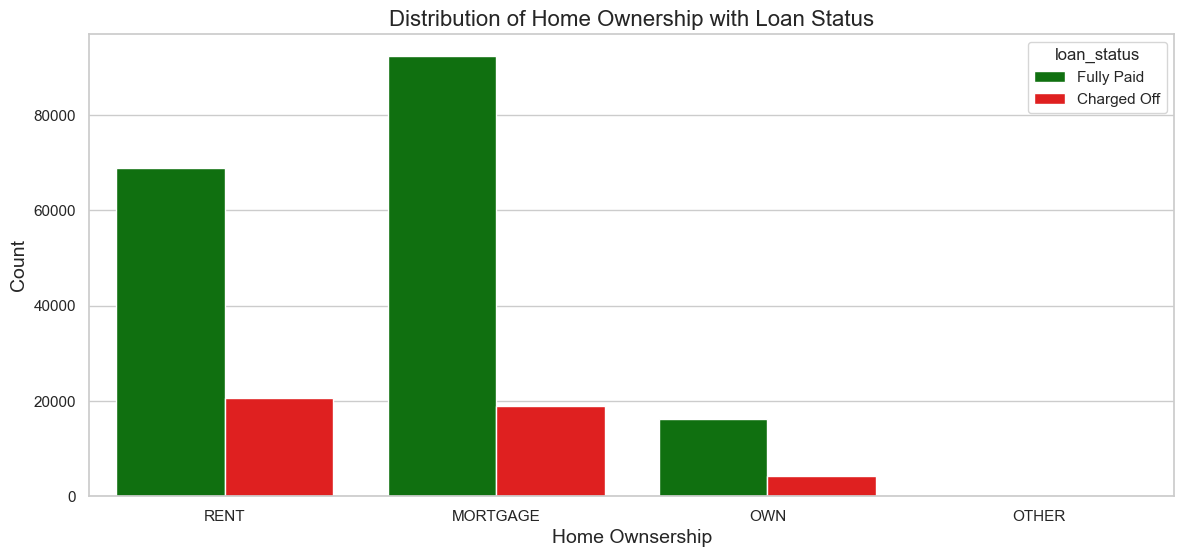

In [108]:
color_palette =  {'Charged Off': 'red', 'Fully Paid': 'green'} 

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.countplot(x='home_ownership', data=df_train, hue='loan_status', palette=color_palette)

plt.xlabel('Home Ownsership', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Home Ownership with Loan Status', fontsize=16)

plt.show()

In [109]:
# percentage charged off 
charged_off_counts = df_train[df_train['loan_status'] == "Charged Off"].groupby("home_ownership").size()
fully_paid_counts = df_train[df_train['loan_status'] == "Fully Paid"].groupby("home_ownership").size()
charged_off_percentage = (charged_off_counts * 100) / (charged_off_counts + fully_paid_counts)
result_df_train = pd.DataFrame({'Hoem Ownership': charged_off_percentage.index, 'Percentage Charged Off': charged_off_percentage.values})
result_df_train.reset_index(drop=True, inplace=True)
display(result_df_train)


,Hoem Ownership,Percentage Charged Off
0,MORTGAGE,17.07
1,OTHER,24.32
2,OWN,20.62
3,RENT,23.10


We can clearly see that the chances of charge off is distinctive for each category and moreover charge off is less likely for applicants with own homes. Therefore we reatin thsi categorical variable and also as ther are only 4 categopries we perform ohe

### 19. verification_status

In [110]:
#verification_status

df_train['verification_status'].value_counts()

verification_status
Source Verified    75890
Verified           73945
Not Verified       71586
Name: count, dtype: int64

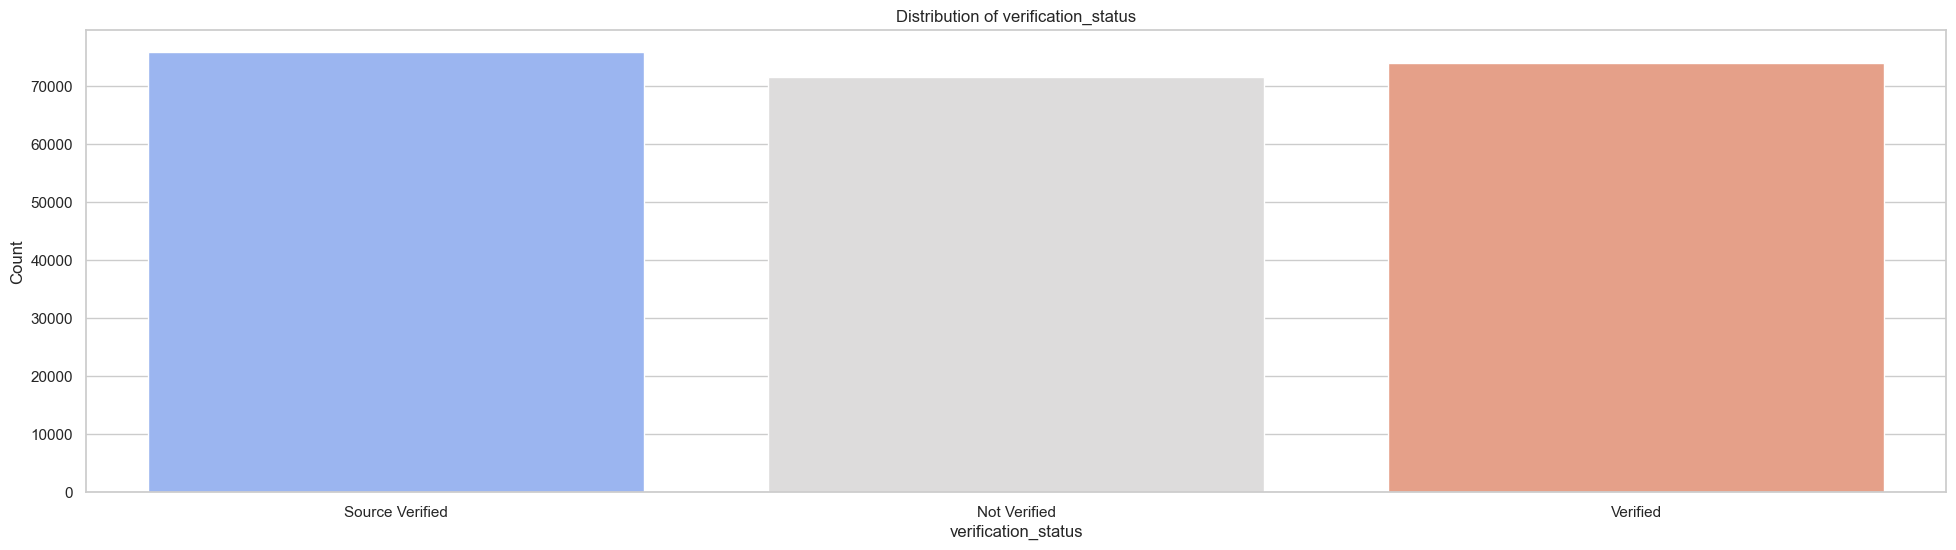

In [111]:
# Distibution of home_ownership

color_palette = sns.color_palette("coolwarm", len(df_train['verification_status'].unique()))

sns.set(style="whitegrid")
plt.figure(figsize=(24, 6))

sns.countplot(x='verification_status', data=df_train, palette=color_palette)

plt.xlabel('verification_status')
plt.ylabel('Count')
plt.title('Distribution of verification_status')

plt.show()

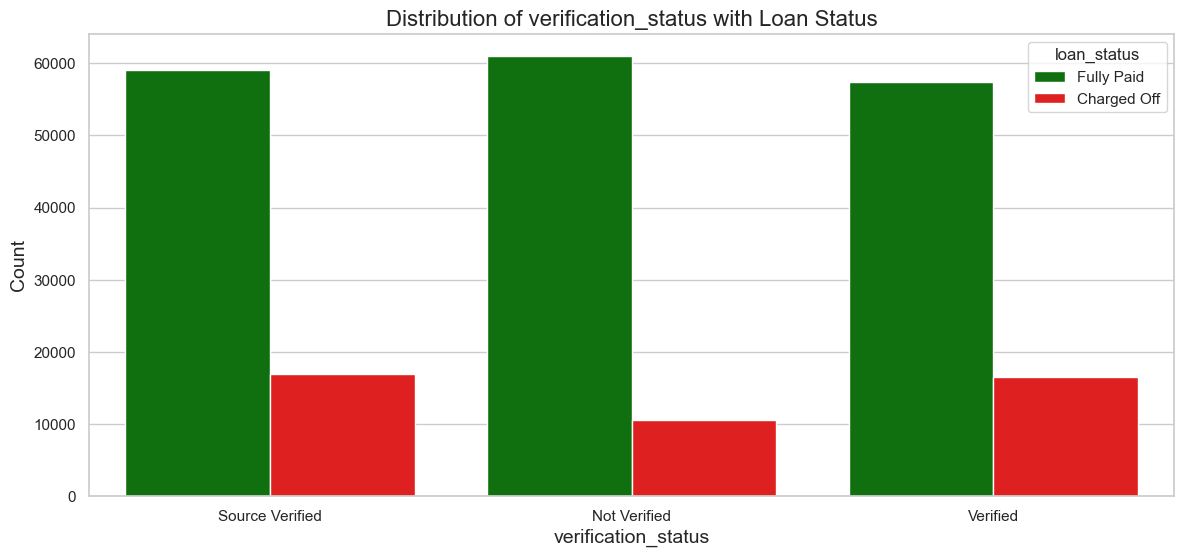

In [112]:
color_palette =  {'Charged Off': 'red', 'Fully Paid': 'green'} 

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.countplot(x='verification_status', data=df_train, hue='loan_status', palette=color_palette)

plt.xlabel('verification_status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of verification_status with Loan Status', fontsize=16)

plt.show()

In [113]:
# percentage charged off 
charged_off_counts = df_train[df_train['loan_status'] == "Charged Off"].groupby("verification_status").size()
fully_paid_counts = df_train[df_train['loan_status'] == "Fully Paid"].groupby("verification_status").size()
charged_off_percentage = (charged_off_counts * 100) / (charged_off_counts + fully_paid_counts)
result_df_train = pd.DataFrame({'verification_status': charged_off_percentage.index, 'Percentage Charged Off': charged_off_percentage.values})
result_df_train.reset_index(drop=True, inplace=True)
display(result_df_train)


,verification_status,Percentage Charged Off
0,Not Verified,14.77
1,Source Verified,22.23
2,Verified,22.29


### 20. purpose

In [114]:
len(df_train['purpose'].unique())

13

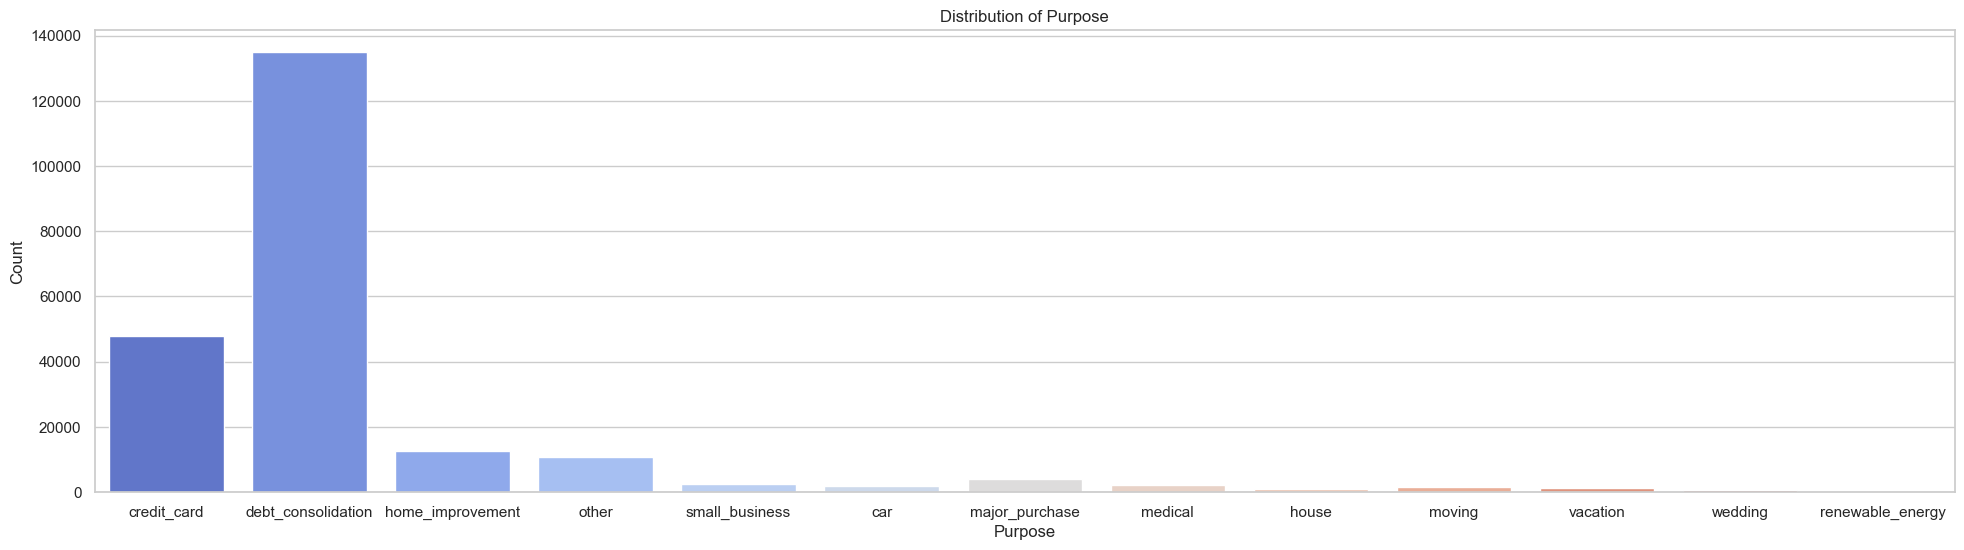

In [115]:
# Distibution of home_ownership

color_palette = sns.color_palette("coolwarm", len(df_train['purpose'].unique()))

sns.set(style="whitegrid")
plt.figure(figsize=(24, 6))

sns.countplot(x='purpose', data=df_train, palette=color_palette)

plt.xlabel('Purpose')
plt.ylabel('Count')
plt.title('Distribution of Purpose')

plt.show()

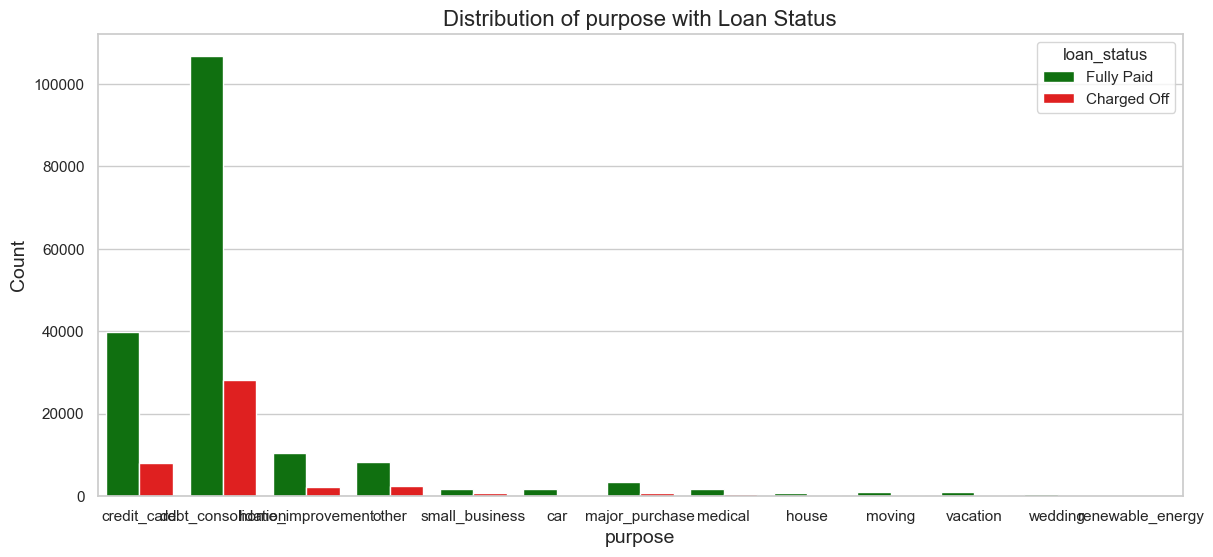

In [116]:
color_palette =  {'Charged Off': 'red', 'Fully Paid': 'green'} 

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.countplot(x='purpose', data=df_train, hue='loan_status', palette=color_palette)

plt.xlabel('purpose', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of purpose with Loan Status', fontsize=16)

plt.show()

In [117]:
# percentage charged off 
charged_off_counts = df_train[df_train['loan_status'] == "Charged Off"].groupby("purpose").size()
fully_paid_counts = df_train[df_train['loan_status'] == "Fully Paid"].groupby("purpose").size()
charged_off_percentage = (charged_off_counts * 100) / (charged_off_counts + fully_paid_counts)
result_df_train = pd.DataFrame({'purpose': charged_off_percentage.index, 'Percentage Charged Off': charged_off_percentage.values})
result_df_train.reset_index(drop=True, inplace=True)
display(result_df_train)


,purpose,Percentage Charged Off
0,car,13.96
1,credit_card,16.74
2,debt_consolidation,20.90
3,home_improvement,17.10
4,house,21.43
5,major_purchase,17.36
6,medical,22.70
7,moving,25.93
8,other,21.87
9,renewable_energy,21.38


### 21. initial_list_status

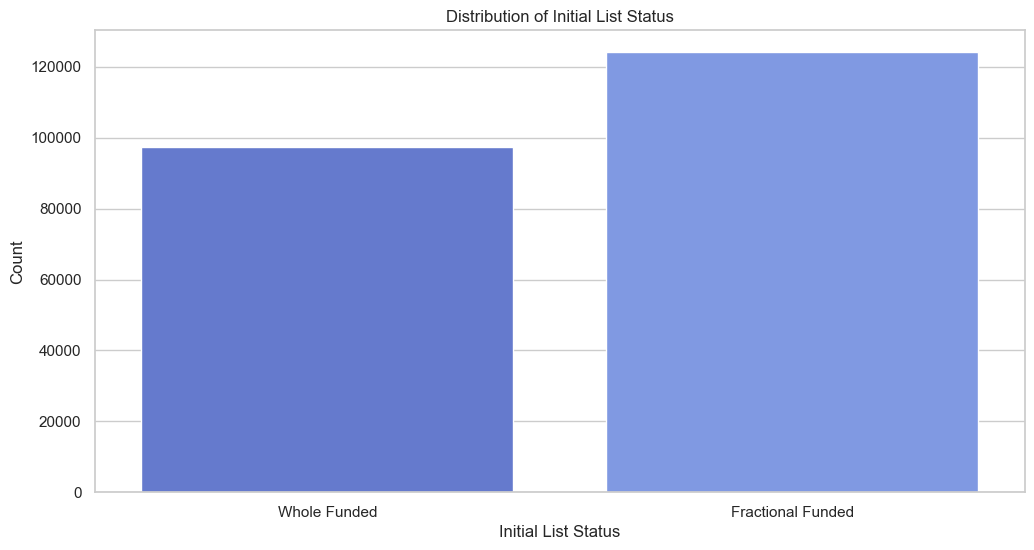

In [118]:
# Distibution of initial_list_status

color_palette = sns.color_palette("coolwarm", len(emp_length_order))

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(x='initial_list_status', data=df_train, palette=color_palette)

plt.xlabel('Initial List Status')
plt.ylabel('Count')
plt.title('Distribution of Initial List Status')

plt.show()

In [119]:
df_train['initial_list_status'].value_counts()

initial_list_status
Fractional Funded    124134
Whole Funded          97287
Name: count, dtype: int64

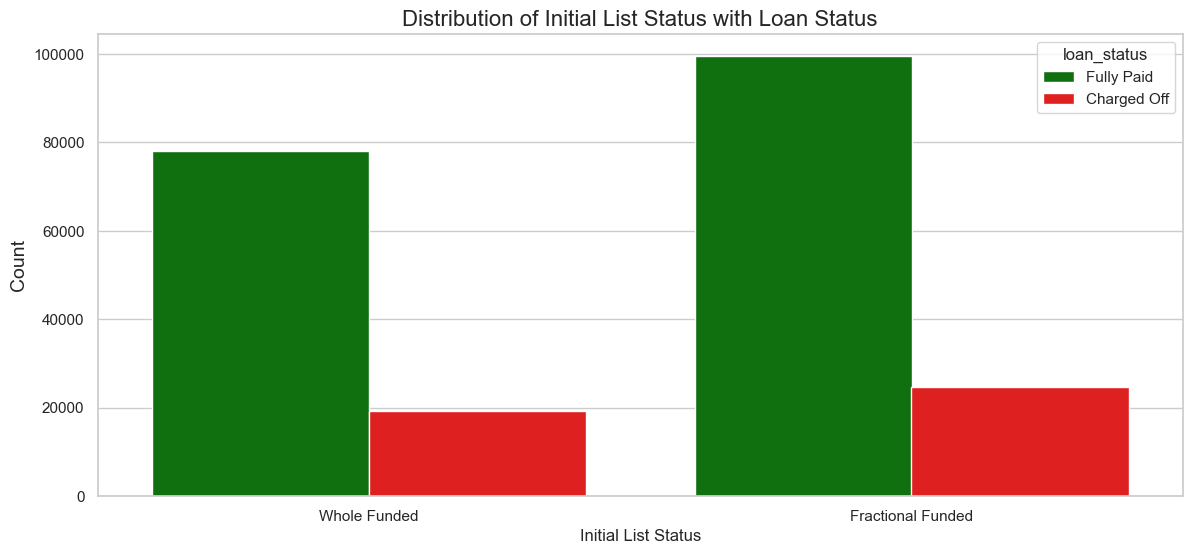

In [120]:
color_palette =  {'Charged Off': 'red', 'Fully Paid': 'green'} 

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.countplot(x='initial_list_status', data=df_train, hue='loan_status', palette=color_palette)

plt.xlabel('Initial List Status')
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Initial List Status with Loan Status', fontsize=16)

plt.show()

In [121]:
# percentage charged off 
charged_off_counts = df_train[df_train['loan_status'] == "Charged Off"].groupby("initial_list_status").size()
fully_paid_counts = df_train[df_train['loan_status'] == "Fully Paid"].groupby("initial_list_status").size()
charged_off_percentage = (charged_off_counts * 100) / (charged_off_counts + fully_paid_counts)
result_df_train = pd.DataFrame({'Initial_list_Status': charged_off_percentage.index, 'Percentage Charged Off': charged_off_percentage.values})
result_df_train.reset_index(drop=True, inplace=True)
display(result_df_train)


,Initial_list_Status,Percentage Charged Off
0,Fractional Funded,19.84
1,Whole Funded,19.84


percentage charged off based on init_list_status is almost similar so this may not aid us in identifying charge off or defaults. therfore we drop this column

In [122]:
df_train = df_train.drop('initial_list_status', axis=1)
df_test = df_test.drop('initial_list_status', axis=1)

### 22. application_type

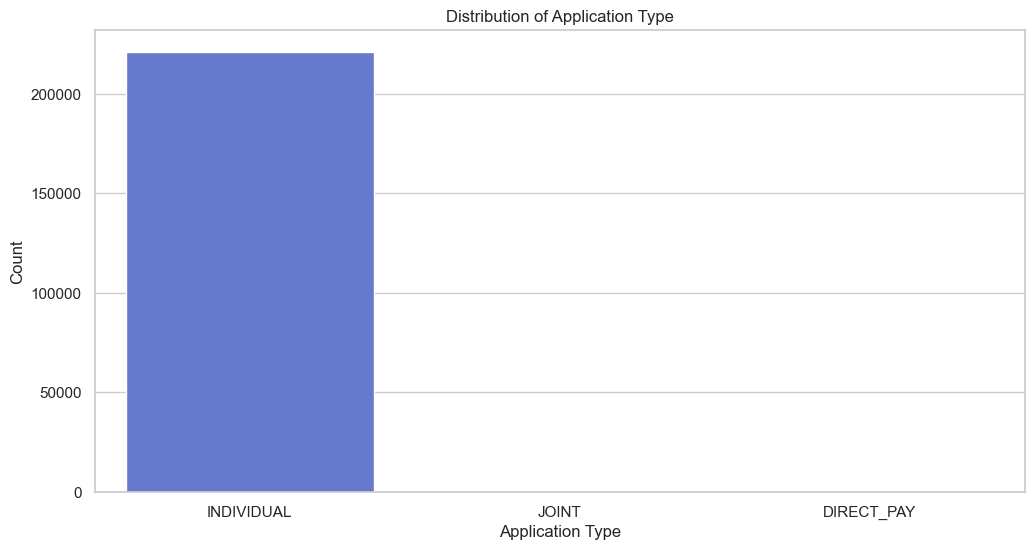

In [123]:
# Distibution of application_type

color_palette = sns.color_palette("coolwarm", len(emp_length_order))

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.countplot(x='application_type', data=df_train, palette=color_palette)

plt.xlabel('Application Type')
plt.ylabel('Count')
plt.title('Distribution of Application Type')

plt.show()

In [124]:
df_train['application_type'].value_counts()

application_type
INDIVIDUAL    221012
JOINT            235
DIRECT_PAY       174
Name: count, dtype: int64

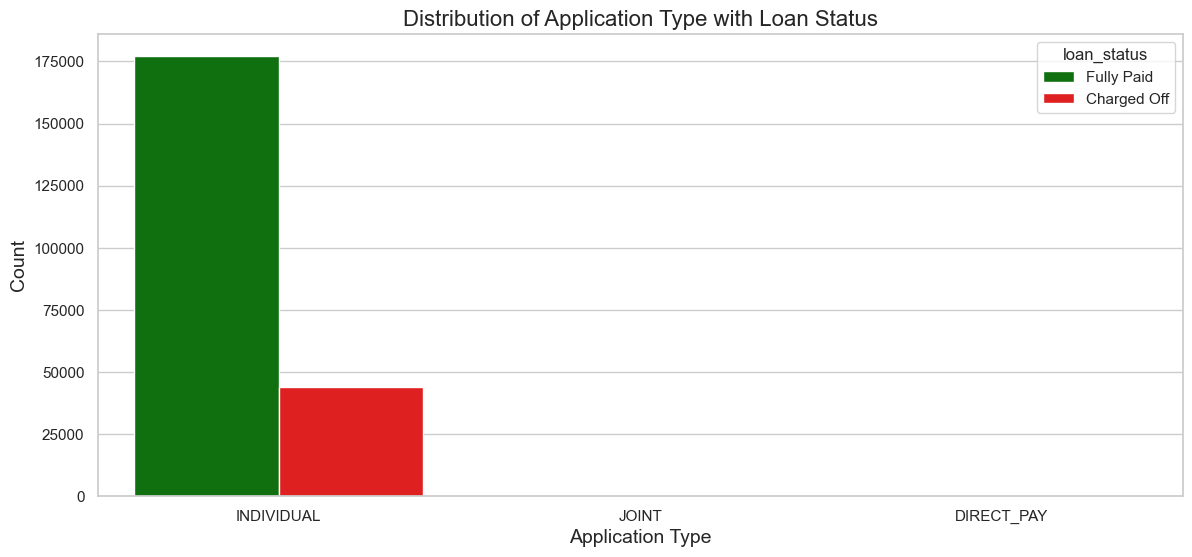

In [125]:
color_palette =  {'Charged Off': 'red', 'Fully Paid': 'green'} 

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))

sns.countplot(x='application_type', data=df_train, hue='loan_status', palette=color_palette)

plt.xlabel('Application Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Application Type with Loan Status', fontsize=16)

plt.show()

In [126]:
# percentage charged off 
charged_off_counts = df_train[df_train['loan_status'] == "Charged Off"].groupby("application_type").size()
fully_paid_counts = df_train[df_train['loan_status'] == "Fully Paid"].groupby("application_type").size()
charged_off_percentage = (charged_off_counts * 100) / (charged_off_counts + fully_paid_counts)
result_df_train = pd.DataFrame({'Application Type': charged_off_percentage.index, 'Percentage Charged Off': charged_off_percentage.values})
result_df_train.reset_index(drop=True, inplace=True)
display(result_df_train)


,Application Type,Percentage Charged Off
0,DIRECT_PAY,35.06
1,INDIVIDUAL,19.84
2,JOINT,8.09


We can clearly see there is a ditiction in loan status based on application_type. So we plan to retain the categorical variable

### 23. earliest_cr_line

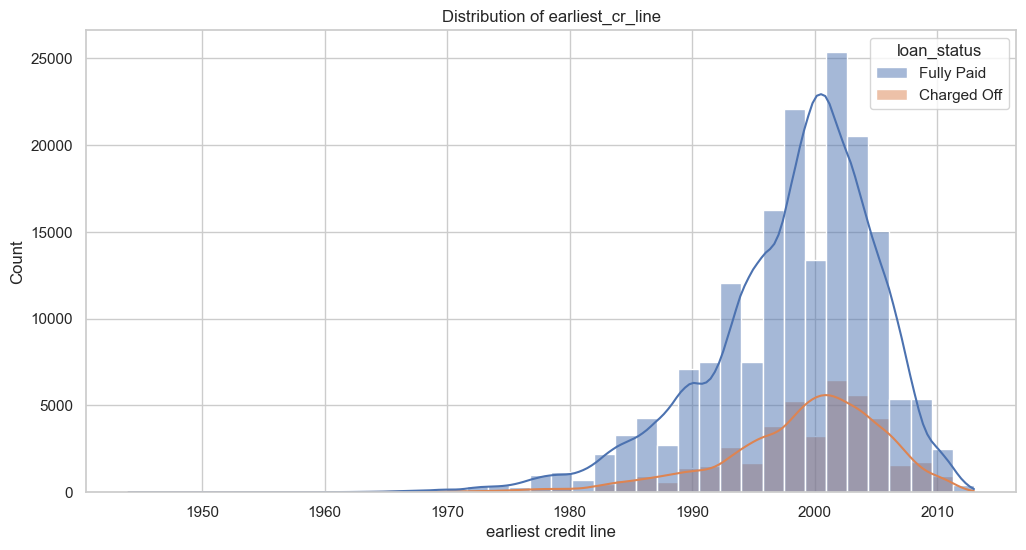

In [127]:
# Distibution of sub_grade
color_palette = sns.color_palette("viridis", len(subgrade_order))

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.histplot(x='earliest_cr_line', data=df_train, hue='loan_status', bins=40, kde=True)

plt.xlabel('earliest credit line')
plt.ylabel('Count')
plt.title('Distribution of earliest_cr_line')


plt.show()

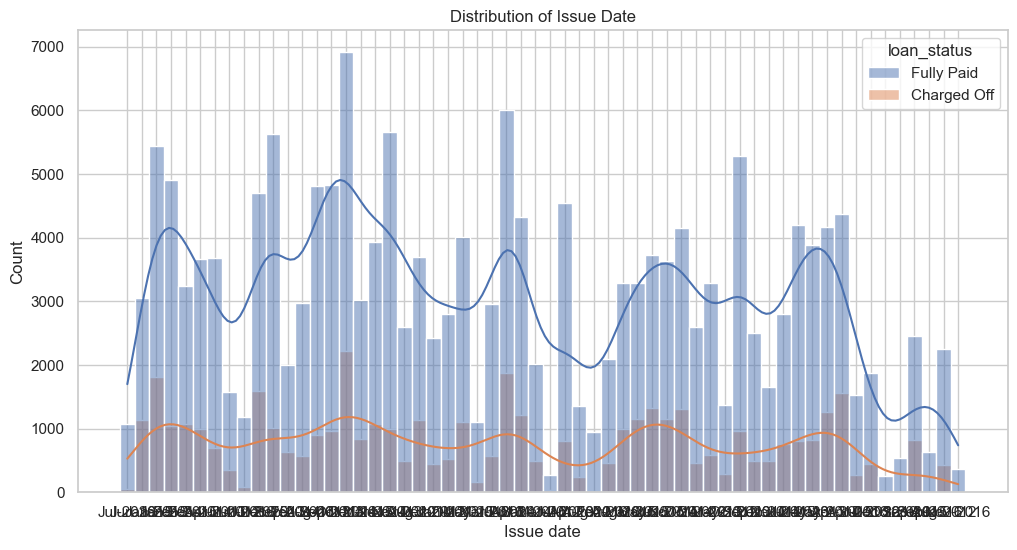

In [128]:
# Distibution of sub_grade
color_palette = sns.color_palette("viridis", len(subgrade_order))

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.histplot(x='issue_d', data=df_train, hue='loan_status', bins=40, kde=True)

plt.xlabel("Issue date")
plt.ylabel('Count')
plt.title('Distribution of Issue Date')


plt.show()

In [129]:
df_train.groupby('loan_status')['earliest_cr_line'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,43928.00,1998.95,6.91,1944.00,1996.00,2000.00,2004.00,2013.00
Fully Paid,177493.00,1998.20,6.93,1950.00,1995.00,1999.00,2003.00,2013.00


Mean earliest_cr_line for customers who fully paid the loan was approx. 1 year before the customers who did not pay the loan

In [130]:
df_train.groupby('loan_status')['issue_d'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,43928,56,Oct-2014,2224
Fully Paid,177493,58,Oct-2014,6911


In [131]:

df_train = df_train.drop('earliest_cr_line' , axis=1)
df_train = df_train.drop('issue_d', axis=1)


In [132]:
df_train.head()

,loan_amnt,term (months),int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,zip_code
39792,7000.00,36,8.99,222.57,B1,RENT,154000.00,Source Verified,Fully Paid,credit_card,23.88,16,0,91725.00,62.20,48,INDIVIDUAL,2.00,5113
18428,2000.00,36,11.53,65.99,B5,RENT,41600.00,Not Verified,Fully Paid,debt_consolidation,26.49,11,0,3541.00,20.10,16,INDIVIDUAL,0.00,22690
276596,24000.00,60,12.39,538.61,C1,MORTGAGE,120000.00,Source Verified,Fully Paid,debt_consolidation,19.01,13,0,38065.00,79.00,34,INDIVIDUAL,1.00,48052
289594,15575.00,60,17.57,391.87,D2,MORTGAGE,62000.00,Source Verified,Charged Off,debt_consolidation,26.06,9,0,15089.00,74.70,23,INDIVIDUAL,5.00,48052
280207,12000.00,36,12.69,402.54,C2,RENT,36000.00,Source Verified,Charged Off,debt_consolidation,34.67,18,0,5681.00,38.60,28,INDIVIDUAL,0.00,86630


In [133]:
df_test = df_test.drop('earliest_cr_line' , axis=1)
df_test = df_test.drop('issue_d', axis=1)


In [134]:
df_train.columns

Index(['loan_amnt', 'term (months)', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'application_type', 'mort_acc', 'zip_code'],
      dtype='object')

In [135]:
df_test.columns

Index(['loan_amnt', 'term (months)', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'application_type', 'mort_acc', 'zip_code'],
      dtype='object')

## Save files 

In [136]:
df_train.to_csv('../data/ptrain.csv', index=False)
df_test.to_csv('../data/ptest.csv', index=False)